In [1]:
import datetime
import pandas as pd
import numpy as np
import warnings
import re
warnings.filterwarnings("ignore")

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score #, explained_variance_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# plot
import matplotlib.pyplot as plt


In [2]:
from sklearn.linear_model import LassoCV #RidgeCV,,ElasticNetCV
# from statsmodels.regression.linear_model import OLS
# from statsmodels.tools import add_constant
# from statsmodels.tsa import stattools

In [5]:
weather_train_set["datetime"].tail()

48403    2020-07-09 19:00:00
48404    2020-07-09 20:00:00
48405    2020-07-09 21:00:00
48406    2020-07-09 22:00:00
48407    2020-07-09 23:00:00
Name: datetime, dtype: object

In [44]:
pv_train_set = pd.read_csv("../data/Training_data_set4/pv_train_set4.csv")
weather_train_set = pd.read_csv("../data/Training_data_set4/weather_train_set4.csv").sort_index(axis=1)
demand_train_set = pd.read_csv("../data/Training_data_set4/demand_train_set4.csv")

In [3]:
pv_train_set.isna().any()

datetime           False
irradiance_Wm-2     True
pv_power_mw         True
panel_temp_C        True
dtype: bool

In [31]:
weather_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48408 entries, 0 to 48407
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         48408 non-null  object 
 1   solar_location1  48336 non-null  float64
 2   solar_location2  48360 non-null  float64
 3   solar_location3  48408 non-null  float64
 4   solar_location4  48408 non-null  float64
 5   solar_location5  48408 non-null  float64
 6   solar_location6  48408 non-null  float64
 7   temp_location1   48408 non-null  float64
 8   temp_location2   48408 non-null  float64
 9   temp_location3   48408 non-null  float64
 10  temp_location4   48360 non-null  float64
 11  temp_location5   48408 non-null  float64
 12  temp_location6   48408 non-null  float64
dtypes: float64(12), object(1)
memory usage: 4.8+ MB


In [21]:
pv_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46704 entries, 0 to 46703
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         46704 non-null  object 
 1   irradiance_Wm-2  46617 non-null  float64
 2   pv_power_mw      46668 non-null  float64
 3   panel_temp_C     46611 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.4+ MB


In [66]:
46704-46668

36

In [64]:
pd.date_range(start='2017-11-03 00:00:00',end="2020-07-09 23:30:00",freq="30T")

DatetimeIndex(['2017-11-03 00:00:00', '2017-11-03 00:30:00',
               '2017-11-03 01:00:00', '2017-11-03 01:30:00',
               '2017-11-03 02:00:00', '2017-11-03 02:30:00',
               '2017-11-03 03:00:00', '2017-11-03 03:30:00',
               '2017-11-03 04:00:00', '2017-11-03 04:30:00',
               ...
               '2020-07-09 19:00:00', '2020-07-09 19:30:00',
               '2020-07-09 20:00:00', '2020-07-09 20:30:00',
               '2020-07-09 21:00:00', '2020-07-09 21:30:00',
               '2020-07-09 22:00:00', '2020-07-09 22:30:00',
               '2020-07-09 23:00:00', '2020-07-09 23:30:00'],
              dtype='datetime64[ns]', length=47040, freq='30T')

In [22]:
demand_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46704 entries, 0 to 46703
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   46704 non-null  object 
 1   demand_MW  46704 non-null  float64
dtypes: float64(1), object(1)
memory usage: 729.9+ KB


In [56]:
pv_train_set.isna().any()

datetime           False
irradiance_Wm-2     True
pv_power_mw         True
panel_temp_C        True
dtype: bool

In [3]:
pv_train_set.describe()

irradiance_Wm-2   pv_power_mw  panel_temp_C
count     46617.000000  46668.000000  46611.000000
mean        150.157712      0.596751     12.114163
std         253.209273      1.009329      8.869242
min           0.000000      0.000000     -6.500000
25%           0.000000      0.000000      6.530000
50%           2.200000      0.000000     10.010000
75%         194.700000      0.770000     15.370000
max        1159.860000      3.810000     52.310000

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()
new_array = scaler.fit_transform(pv_train_set.drop(columns="datetime").values)
new_array

array([[-0.68601092],
       [-0.74148633],
       [-0.88572238],
       ...,
       [-1.11871908],
       [-1.20747973],
       [-1.32952562]])

<AxesSubplot:>

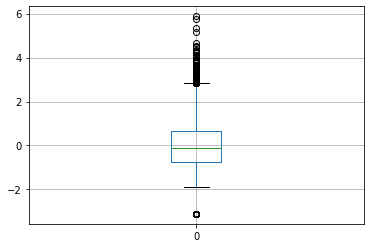

In [114]:
pd.DataFrame(new_array).boxplot()

<AxesSubplot:>

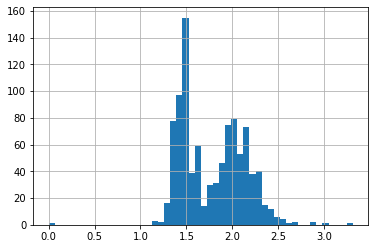

In [118]:
demand_train_set[hour_train==6]["demand_MW"].hist(bins=50)

<AxesSubplot:>

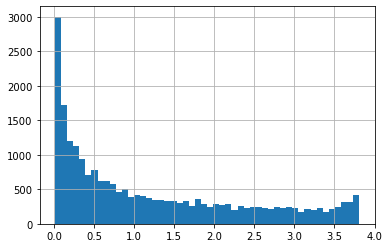

In [63]:
pv_train_set[pv_train_set["pv_power_mw"]>0]["pv_power_mw"].hist(bins=50)

In [32]:
pv_train_set.iloc[[0,-1],:]

datetime  irradiance_Wm-2  pv_power_mw  panel_temp_C
0      2017-11-03 00:00:00              0.0          0.0          7.05
46703  2020-07-02 23:30:00              0.0          0.0          8.33

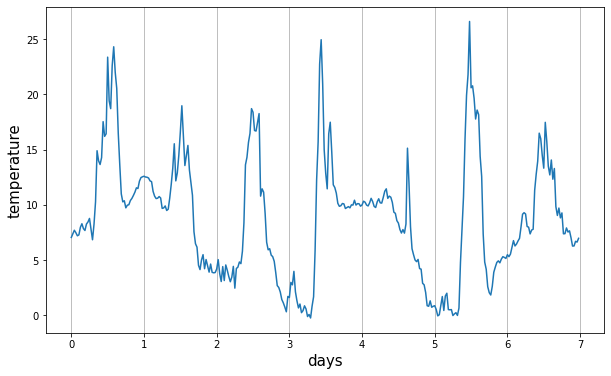

In [27]:
plt.figure(figsize=(10,6))
plt.plot(pv_train_set["panel_temp_C"][:48*7])
plt.xticks(ticks = np.linspace(0,48*7,8), labels = list(map(int,np.linspace(0,7,8))),size=10)
plt.grid(axis='x')
plt.xlabel("days",size=15)
plt.ylabel("temperature",size=15)
plt.show()

<AxesSubplot:xlabel='hour'>

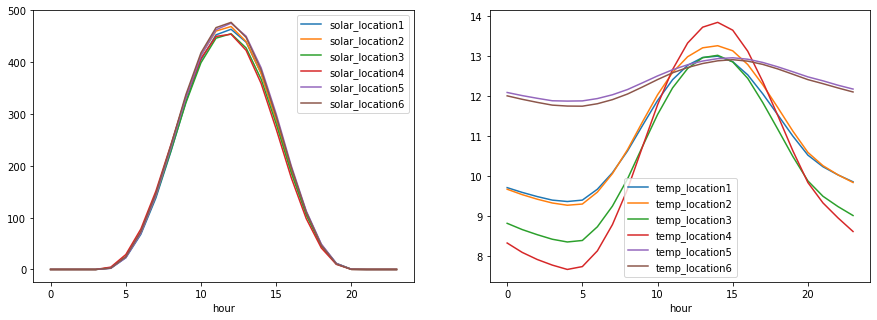

In [40]:
weather_set = weather_train_set.copy(deep=True)
weather_set.rename(columns={"datetime":"hour"},inplace=True)
weather_set.index = pd.DatetimeIndex(weather_set.hour).hour
fig,axes = plt.subplots(1,2,figsize=(15,5))
weather_set.filter(like="solar").groupby(by=weather_set.index).mean().plot(ax=axes[0])
weather_set.filter(like="temp").groupby(by=weather_set.index).mean().plot(ax=axes[1])

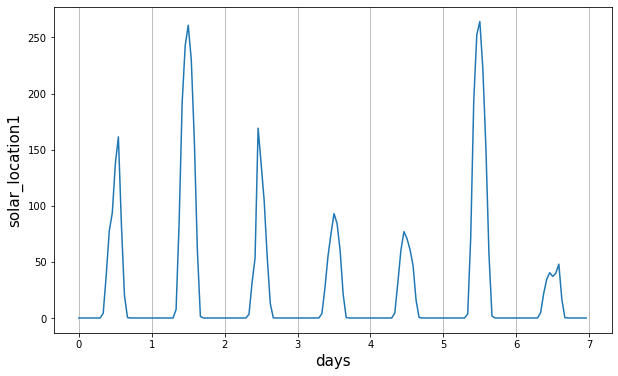

In [12]:
plt.figure(figsize=(10,6))
plt.plot(weather_train_set["solar_location1"][:24*7]) #solar_location1
plt.xticks(ticks = np.linspace(0,24*7,8), labels = list(map(int,np.linspace(0,7,8))),size=10)
plt.grid(axis='x')
plt.xlabel("days",size=15)
plt.ylabel("solar_location1",size=15)
plt.show()

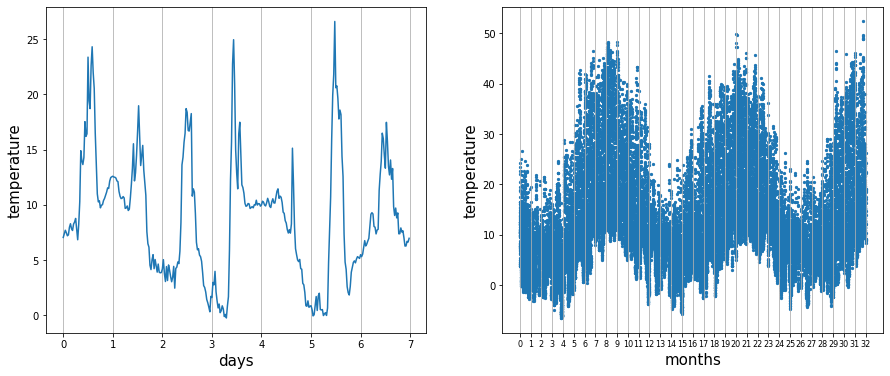

In [58]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
ax[0].plot(pv_train_set["panel_temp_C"][:48*7])
ax[0].set_xticks(np.linspace(0,48*7,8))
ax[0].set_xticklabels(list(map(int,np.linspace(0,7,8))))
ax[0].grid(axis='x')
ax[0].set_xlabel("days",size=15)
ax[0].set_ylabel("temperature",size=15)

ax[1].scatter(pv_train_set.index,pv_train_set["panel_temp_C"],s=5, )
# 2+12*2+7 = 33
ax[1].set_xticks(ticks = np.linspace(0,pv_train_set.shape[0],33))
ax[1].set_xticklabels(list(map(int,np.linspace(0,32,33))))
ax[1].tick_params(axis = 'x', which = 'major', labelsize = 8)
ax[1].grid(axis='x')
ax[1].set_xlabel("months",size=15)
ax[1].set_ylabel("temperature",size=15)

# # the temperature minus the temperature of yesterday
# ax[1].plot(pv_train_set["panel_temp_C"]-pv_train_set["panel_temp_C"].shift(48))
# # set the font size of the x tick
# ax[1].tick_params(axis = 'x', which = 'major', labelsize = 10)
# ax[1].set_title("days difference average temperature")



plt.show()

In [130]:
# using the data of i day before to fill the nans
def fill_nan_with_moving_average(df,h):
    for column in df.columns:
        for nan_index in df[df[column].isna()].index:
            n = 0
            fill_value = 0
            for i in range(1,4):
                if not pd.isnull(df[column][nan_index-h*i]):
                    fill_value += df[column][nan_index-h*i]
                    n+=1
                if not pd.isnull(df[column][nan_index+h*i]):
                    fill_value += df[column][nan_index+h*i]
                    n+=1
            fill_value /= n  
            df[column][nan_index] = fill_value
    return df

In [302]:
weather_train_set = fill_nan_with_moving_average(weather_train_set,24)

In [50]:
calculate_day("2017-02-03 05:30:00")

34

In [6]:
def calculate_hour(datetime):
    return int(datetime[11:13])*2 + int(datetime[14])/3


In [7]:
def calculate_day(real_datetime):
    return int(datetime.datetime.strptime(real_datetime, "%Y-%m-%d %H:%M:%S").strftime("%j"))

In [8]:
def merge_day_before_n(df, n, df_before):
    # used when the drop the columns
    df_before_copy = df_before.copy(deep=True)
    m = n
    while n>0:
        df_before_copy.index = df_before_copy.index + 48
        df = df.join(df_before_copy, rsuffix="_day"+str(m-n+1), how = "left")
        n -= 1
        
    df.drop(columns=filter(lambda s: re.match("datetime_day\d+",s),df.columns),inplace = True,axis=1)    
    return df
# merge_day_before_n(pv_train_set.iloc[:,[0,1]], 2)

X is the Reanalysis weather data of the six places and the true weather data before today

In [17]:
pv_train_set["datetime"].apply(calculate_hour)

0         0.0
1         1.0
2         2.0
3         3.0
4         4.0
         ... 
46699    43.0
46700    44.0
46701    45.0
46702    46.0
46703    47.0
Name: datetime, Length: 46704, dtype: float64

In [246]:
pd.DataFrame({"a":[1,2,3]})

a
0  1
1  2
2  3

In [56]:
def outlier_delete(raw_column,hour_column):
    full_column = raw_column.copy(deep=True)
    list_outlier = []
    for i in range(48):
        column = full_column[hour_column==i]
        percentile = np.percentile(column.values,[25,75])
        IQR = percentile[1] - percentile[0]
        upLimit = percentile[1]+IQR*1.5
        downLimit = percentile[0]-IQR*1.5
        outliers = column[(column>upLimit)|(column<downLimit)]
        if outliers.shape[0] != 0:
            
            list_outlier.append([i,outliers.shape[0]])
            column[(column>upLimit)|(column<downLimit)]= np.nan
            full_column[hour_column==i] = column
    return full_column,list_outlier

In [251]:
def outlier_delete_all(raw_column,hour_column):
    outlier_list=[0]
    circle_time = 4
    while len(outlier_list)>0:
        raw_column,outlier_list = outlier_delete(raw_column,hour_column)
        try:
            raw_column = fill_nan_with_moving_average(raw_column,48)
        except:
            raw_column = fill_nan_with_moving_average(raw_column.to_frame(),48)
        circle_time -= 1
        if circle_time == 0:
            break
    return raw_column

In [79]:
def outlier_detector(raw_column,hour_column):
    full_df = raw_column.to_frame()
    temp["hour"] = hour_column
    temp["hour"] = temp["hour"].astype("int")
    temp.boxplot(column="panel_temp_C",by="hour",figsize=(15,6))
#     plt.title("Boxplot of Temperature at Each Hour",y=-0.15)

In [60]:
pv_hour = pv_train_set["datetime"].apply(calculate_hour)

In [70]:
_,list_outlier = outlier_delete(pv_train_set["panel_temp_C"],pv_hour)
list_outlier

[]

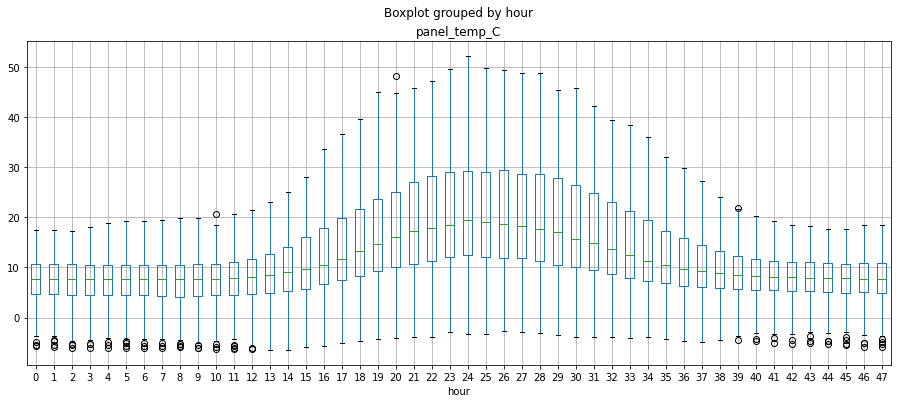

In [80]:
outlier_detector(pv_train_set["panel_temp_C"],pv_hour)

In [273]:
def temp_sol_reg_data(o_half, pv_df, weather_df_raw,ispredict):
    """
    description: construct the X and Y for regression
    """
    # choose the data whether at half o'clock
    part_pv_df =pv_df[(pv_df.iloc[:,0].str[14]=="3")].copy(deep=True) if o_half else pv_df[(pv_df.iloc[:,0].str[14]=="0")].copy(deep=True)
        
    # using the hour as a variable
    part_pv_df["hour"] = part_pv_df["datetime"].apply(calculate_hour)  
    part_pv_df['sin48'] = np.sin(2 * np.pi * part_pv_df["hour"] / 48)
    part_pv_df['cos48'] = np.cos(2 * np.pi * part_pv_df["hour"] / 48)
    part_pv_df['sin48_2'] = np.sin(4 * np.pi * part_pv_df["hour"] / 48)
    part_pv_df['cos48_2'] = np.cos(4 * np.pi * part_pv_df["hour"] / 48)
    
    part_pv_df["day"] = part_pv_df["datetime"].apply(calculate_day)
    part_pv_df['sin365'] = np.sin(2 * np.pi * part_pv_df["day"] / 365.25)
    part_pv_df['cos365'] = np.cos(2 * np.pi * part_pv_df["day"] / 365.25)
    part_pv_df['sin365_2'] = np.sin(4 * np.pi * part_pv_df["day"] / 365.25)
    part_pv_df['cos365_2'] = np.cos(4 * np.pi * part_pv_df["day"] / 365.25)
    
    part_pv_df.drop(columns=["day","hour"],axis=1,inplace=True)
    
    weather_df = weather_df_raw.copy(deep=True)
    weather_df["datetime"] = weather_df["datetime"].str[:13]
    part_pv_df["datetime"] = part_pv_df["datetime"].str[:13]

    joined_data = part_pv_df.set_index("datetime").join(weather_df.set_index("datetime"),on="datetime", how="inner")   
    if ispredict:
        return joined_data.drop(columns=["Y"],axis=1)
    else:
        # we donot care the time series in the linear regresssion, so drop the rows where na shows up
        joined_data.dropna(how="any",axis=0,inplace=True)
        Y, X = joined_data.filter(items=["Y"],axis=1), joined_data.drop(columns=["Y"],axis=1)
        return X, Y
# temp_sol_reg_data(3,"0")    

In [274]:
def linear_predict(name, X, Y, draw_picture):
    """
    name(String): the column name used in the plot
    o_half(bool): True implicate latter we will use the half o'clock data, otherwise o'clock data
    pv_df, weather_df: two df that will be merged by "datetime"
    draw_picture(bool): weather to draw the prediction and real value
    """
     
    
    X, Y = X.values, Y.values
# try ElasticNetCV but get the samilar answer
# l1_ratio is a list, in which case the different values are 
# tested by cross-validation and the one giving the best prediction score is used.
#     elasticNetCV = ElasticNetCV(l1_ratio = [1e-4,0.001,0.01,0.1,0.5,1],
#                               alphas = [1e-4,1e-3,0.01, 0.1, 0.5,1], 
#                               max_iter = 1000, cv = 5,normalize = True).fit(X, Y)     
#     predict_Y = elasticNetCV.predict(X)

# try MLP but get the samilar answer
#     from sklearn.neural_network import MLPRegressor
#     from sklearn.model_selection import train_test_split
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
#     temp_reg = MLPRegressor(hidden_layer_sizes=(100,10 )random_state=1, max_iter=5000,activation='relu').fit(X_train, y_train)
#     predict_Y = temp_reg.predict(X_test)

    # split the data into train and test, using train set to fit the model, using test set to get the score
    train_size = int(len(Y)*0.8)
    X_train, X_test, y_train, y_test = X[:train_size],X[train_size:],Y[:train_size],Y[train_size:]
    temp_reg = LassoCV(alphas = [1e-6,1e-5,0.0001, 0.001, 0.01, 0.1],normalize = True, 
                max_iter = 5000, cv = 5)
    temp_reg.fit(X_train, y_train)
    predict_Y = temp_reg.predict(X_test) 
    
    
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)
#     train_size = int(len(Y)*0.8)
#     X_train, X_test, y_train, y_test = X[:train_size],X[train_size:],Y[:train_size],Y[train_size:]
#     temp_reg = LinearRegression().fit(X_train, y_train)    
#     predict_Y = temp_reg.predict(X_test) 
    
    # draw picture
    if draw_picture:

        fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
        # the predictors of temp and solar at half and entire o'clock are different, but it is not true for pv data,
        # thus, using m to identify the plots interval
        m = 1
        if name == 'pv':
            m = 2
        ax[0].plot(temp_reg.predict(X[-24*m*7-1:]), linewidth=3,label="Predict "+ name)
        ax[0].scatter(np.arange(24*7*m+1), Y[-24*m*7-1:], c='orange', s=5, label="Real "+ name) 
        ax[0].set_xticks(np.linspace(0,24*m*7,8))
        xticks = pv_train_set["datetime"][-48*7-1:].reset_index(drop=True)
        xticks = xticks[xticks.index.isin(np.linspace(0,48*7,8))].str[5:10].values
        ax[0].set_xticklabels(xticks)
        ax[0].legend() 
        ax[0].set_title("The final weak prediction", y=-0.15)
        Y_predict_Y = pd.DataFrame({"predict_Y":predict_Y.reshape(1, -1)[0],"y_test":y_test.reshape(1, -1)[0]}).sort_values("predict_Y").reset_index()
        ax[1].plot(Y_predict_Y.index,Y_predict_Y.predict_Y, linewidth=3, label="Predict "+ name)
        ax[1].scatter(Y_predict_Y.index, Y_predict_Y.y_test, c='orange', s=5, label="Real "+ name)
        ax[1].set_title("Total test data sorted by the predicted value", y=-0.15)
        ax[1].legend()
        plt.show()
        
    score1 = r2_score(y_test,predict_Y)
    score2 = mean_squared_error(y_test,predict_Y)
    

    # using the whole data to do regression again
#     temp_reg = LinearRegression().fit(X, Y)
    
    temp_reg = LassoCV(alphas = [1e-6,1e-5,0.0001, 0.001, 0.01, 0.1],normalize = True, 
            max_iter = 50000, cv = 10).fit(X, Y)
       
#     R2 = temp_reg.score(X, Y)
#     predict_Y = temp_reg.predict(X)
#     MSE = mean_squared_error(Y,predict_Y)  

#     return elasticNetCV.score(X, Y), mean_squared_error(Y,predict_Y), elasticNetCV  
#     return regr.score(X,Y), mean_squared_error(Y,predict_Y)
    return score1, score2, temp_reg

In [275]:
def choose_n_day(name, o_half, n):
    """
    description: use the plots to choose how many day before can be used in the prediction
    """
    if name=="temp":
        weather_train_columns = np.append(0,np.arange(7,13))
        pv_train_columns = [0,3]
    elif name=="solar":
        weather_train_columns = np.arange(7)
        pv_train_columns = [0,1]  
    elif name == "pv":
        weather_train_columns = np.arange(weather_train_set.shape[1])
        pv_train_columns = [0,2]
    weather_df = weather_train_set.iloc[:,weather_train_columns]  
    R_MSE = []
    for i in range(n):
        pv_weather_df = pv_train_set.iloc[:,pv_train_columns].copy(deep=True)
        pv_weather_df = pv_weather_df.rename(columns={pv_weather_df.columns[1]:"Y"})

        pv_weather_df = merge_day_before_n( pv_weather_df, i, pv_weather_df)     
        X, Y = temp_sol_reg_data(o_half, pv_weather_df, weather_df, False) 
        R_MSE.append(linear_predict(name,X,Y, False)[:2])
    R_MSE = np.array(R_MSE).T
    
    # 
    draw_R_MSE(R_MSE,n)

In [276]:
def draw_R_MSE(R_MSE,n):
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
    ax[0].plot(np.arange(n),R_MSE[0], linewidth=3,c="b", label="coefficient of determination R2")
    ax[1].plot(np.arange(n),R_MSE[1], linewidth=3,c="r", label="MSE")
    ax[0].set_xlabel('n day before')
    ax[1].set_xlabel('n day before')
    ax[0].legend()
    ax[1].legend()
    plt.show() 

### Temperature Prediction

In [303]:
temp_weather_df = weather_train_set.iloc[:,np.append(0,np.arange(7,13))]

通过傅里叶项已经把half hour 和非half hour 区分开了，没必要给这两个分别建模型，后面有时间可以进行修改精简

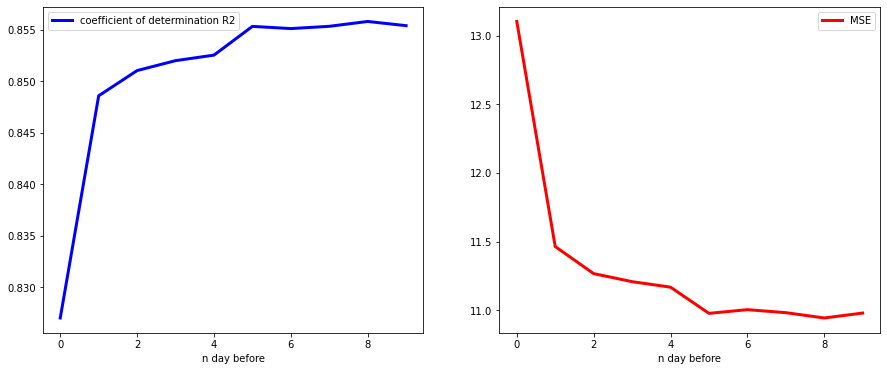

In [32]:
# at half o'clock
choose_n_day("temp", True,10)

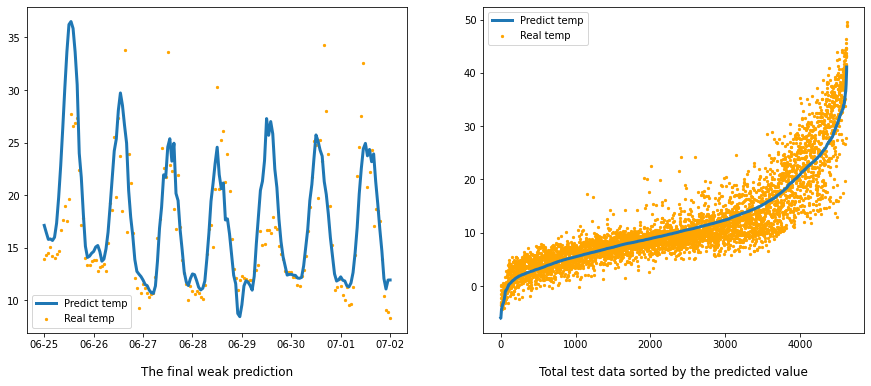

Coefficient of determination R2 is : 0.850859 and MSE is: 11.295558


In [278]:
pv_temp_df = merge_day_before_n(pv_train_set.iloc[:,[0,3]],2,pv_train_set.iloc[:,[0,3]])
pv_temp_df = pv_temp_df.rename(columns={"panel_temp_C":"Y"})
X, Y = temp_sol_reg_data(True, pv_temp_df, temp_weather_df, False)
R2,MSE,temp_h_reg =  linear_predict("temp",X,Y, True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [233]:
# don't forget to common the line using the whole data to do the prediction in the linear_predict function
Y_test = Y[int(len(Y)*0.8):].values
Y_pred = temp_h_reg.predict(X[int(len(Y)*0.8):])

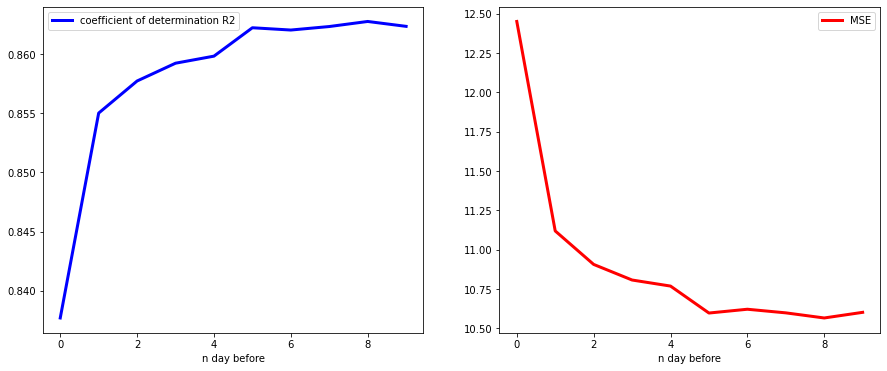

In [30]:
# at o'clock
choose_n_day("temp", False,10)

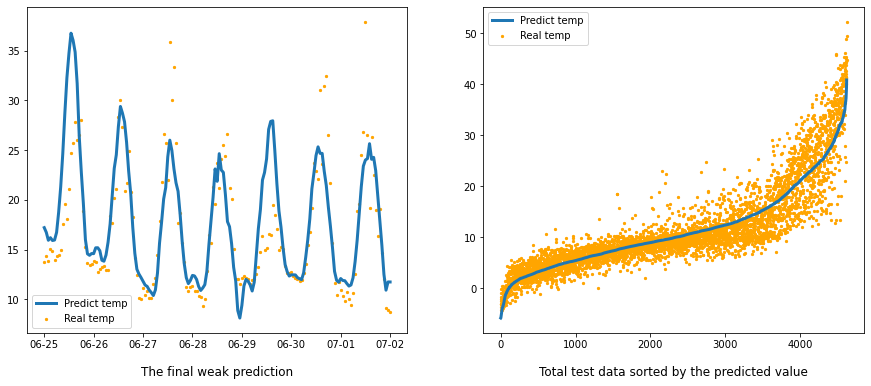

Coefficient of determination R2 is : 0.857556 and MSE is: 10.936216


In [279]:
pv_temp_df = merge_day_before_n(pv_train_set.iloc[:,[0,3]], 2, pv_train_set.iloc[:,[0,3]])
pv_temp_df = pv_temp_df.rename(columns={"panel_temp_C":"Y"})
X, Y = temp_sol_reg_data(False, pv_temp_df, temp_weather_df, False)
R2,MSE,temp_o_reg =  linear_predict("temp",X,Y, True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [16]:
Y_test = np.append(Y_test,Y[int(len(Y)*0.8):].values)
Y_pred = np.append(Y_pred,temp_h_reg.predict(X[int(len(Y)*0.8):]))
print("The combined MSE for total temperature data is: %f" % (mean_squared_error(Y_test,Y_pred)))

NameError: name 'Y_test' is not defined

### Solar Prediction

In [304]:
sol_weather_df = weather_train_set.iloc[:,np.arange(7)]

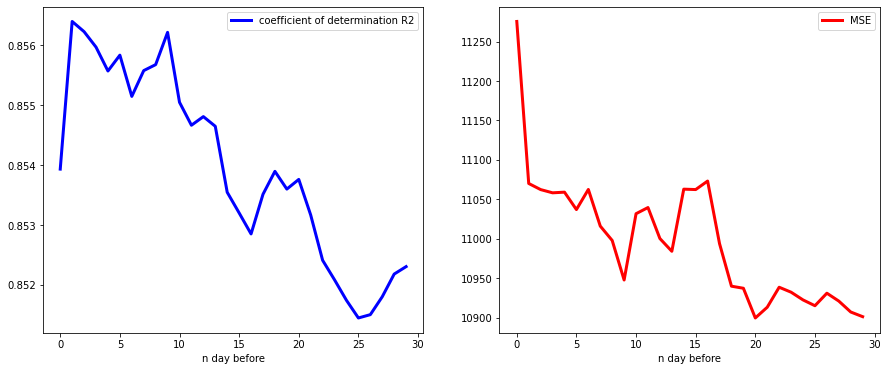

In [121]:
# at half o'clock
choose_n_day("solar", True,30)

the R2 fluctuates around after merge the data before n days, thus the data before n days helps to improve the result a little. We do not using the historical solar data

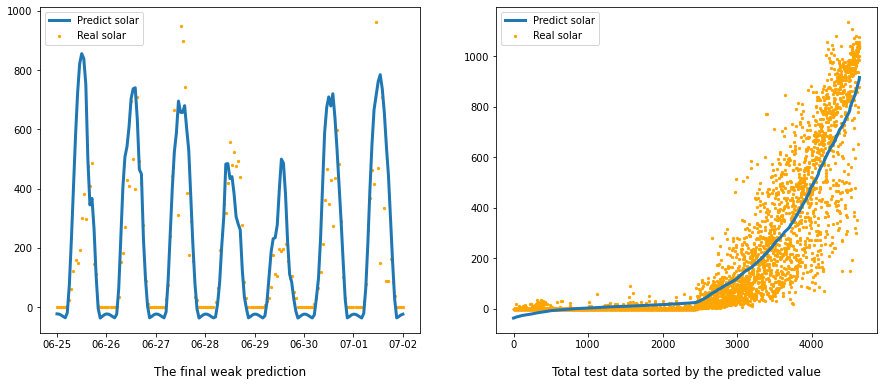

Coefficient of determination R2 is : 0.857309 and MSE is: 10920.738928


In [281]:
pv_sol_df = pv_train_set.iloc[:,[0,1]]
# pv_sol_df = merge_day_before_n(pv_train_set.iloc[:,[0,1]], 2, pv_train_set.iloc[:,[0,1]])
pv_sol_df =  pv_sol_df.rename(columns={"irradiance_Wm-2":"Y"})
X,Y = temp_sol_reg_data(True, pv_sol_df, sol_weather_df, False)
R2,MSE,sol_h_reg =  linear_predict("solar",X,Y, True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

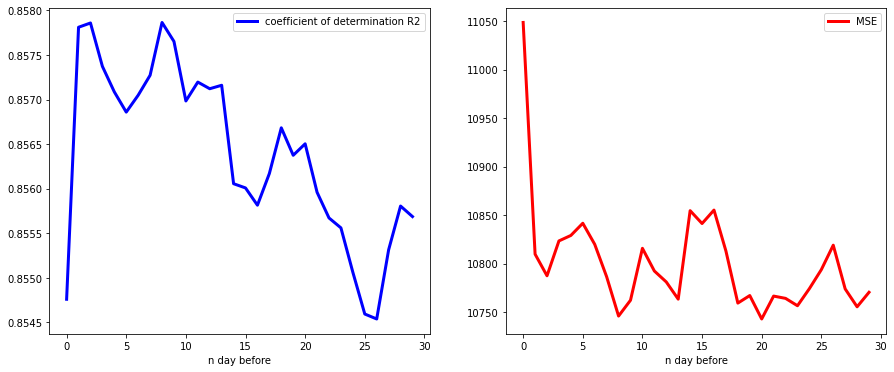

In [38]:
# at o'clock
choose_n_day("solar", False,30)

the R2 fluctuates around after merge the data before n days, thus the data before n days helps to improve the result a little. We do not using the historical solar data

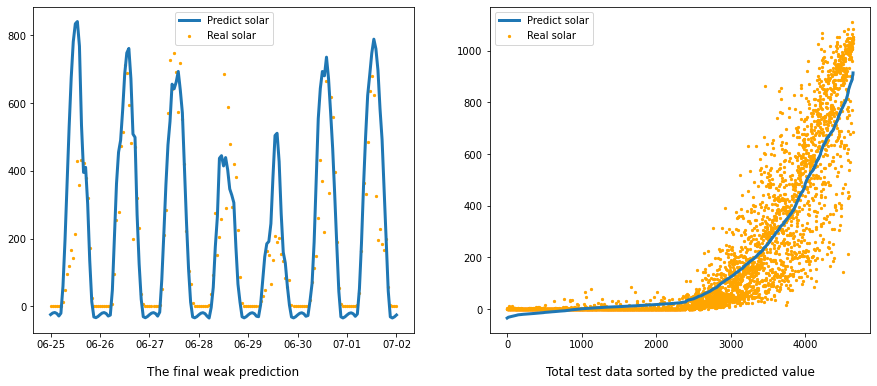

Coefficient of determination R2 is : 0.857981 and MSE is: 10716.894302


In [282]:
pv_sol_df = pv_train_set.iloc[:,[0,1]]
pv_sol_df = pv_sol_df.rename(columns={"irradiance_Wm-2":"Y"})
X,Y = temp_sol_reg_data(False, pv_sol_df, sol_weather_df, False)
R2,MSE,sol_o_reg =  linear_predict("solar",X,Y, True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [283]:
# deal with the na in pv data
pv_train_set_new = pv_train_set.copy(deep=True)
def fill_na(column, n, df_fill=pv_train_set_new): 
    """
    n: merge the data of n day before
    """
    if column=="temp":
        pv_column = 3
        weather_df = temp_weather_df
        regressors = [temp_o_reg, temp_h_reg]
    elif column == "solar":
        pv_column = 1
        weather_df = sol_weather_df
        regressors = [sol_o_reg, sol_h_reg]
    elif column == "pv":
        pv_column = 2
        regressor = pv_reg  
    
    # since we will always using the data of n day before to do the prediction, so we predict row by row
    while df_fill.iloc[:,pv_column].isna().any():
        
        if column != "pv":
            na_row =  df_fill[df_fill.iloc[:,pv_column].isna()].iloc[[0],[0,pv_column]]
            # choose the regressor according to weather it is half o'clock. If the judgement is True,then using the half o'clock regressor 
            regressor = regressors[na_row.iloc[0,0][14] == "3"]
        else:
            na_row =  df_fill[df_fill.iloc[:,pv_column].isna()].iloc[[0],:]
            
        # to locate the row in the df_fill
        na_row_index = na_row.index   

            
        # using the hour as a variable
#         na_row["hour"] = na_row["datetime"].apply(calculate_hour)
        
        # construct X
        if column != "pv":
            na_row = merge_day_before_n(na_row, n, df_fill.iloc[:,[0,pv_column]]).reset_index(drop=True)
            weather_row = weather_df[weather_df["datetime"].str[:13]==na_row.iloc[0,0][:13]].reset_index(drop=True)
            na_row = na_row.rename(columns={na_row.columns[1]:"Y"})

            X = temp_sol_reg_data(na_row.iloc[0,0][14] == "3", na_row, weather_row,True)
#             X = np.array(pd.concat([na_row.iloc[:,2:],weather_row],axis=1))
        else:
            # select the temp, solar, the historical and the hour data
            X = pv_X_Y(na_row,n,True)
            
        predict_y = regressor.predict(X)      
        if column != "temp":
            predict_y = max(predict_y, 0)
            
        df_fill.iloc[na_row_index,pv_column] = predict_y
        
fill_na("temp",2)
fill_na("solar",0)

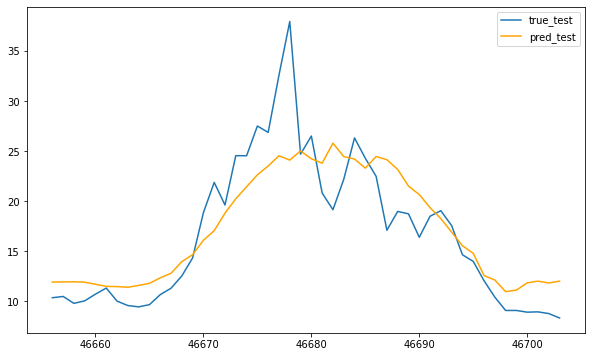

In [125]:
# test the fillna() function
real = pv_train_set_new.iloc[-48:,3].copy(deep=True)
pv_train_set_new.iloc[-48:,3] = np.nan
fill_na("temp",2)
predict = pv_train_set_new.iloc[-48:,3]
plt.figure(figsize=(10,6))
plt.plot(real)
plt.plot(predict, color="orange")
plt.legend(["true_test","pred_test"])
plt.show()

In [284]:
def pv_X_Y(pv_df_raw,n,ispredict,pv_merge=pv_train_set_new):
    """
    merge pv data with the days before n
    """
    pv_df = pv_df_raw.copy(deep=True)
    pv_pv_df = merge_day_before_n(pv_df, n, pv_merge.iloc[:,[0,2]])
    

    
    pv_pv_df["hour"] = pv_pv_df["datetime"].apply(calculate_hour)
    # using the hour as a variable
    pv_pv_df['sin48'] = np.sin(2 * np.pi * pv_pv_df["hour"] / 48)
    pv_pv_df['cos48'] = np.cos(2 * np.pi * pv_pv_df["hour"] / 48)
    pv_pv_df['sin48_2'] = np.sin(4 * np.pi * pv_pv_df["hour"] / 48)
    pv_pv_df['cos48_2'] = np.cos(4 * np.pi * pv_pv_df["hour"] / 48)
    
    pv_pv_df["day"] = pv_pv_df["datetime"].apply(calculate_day)
    pv_pv_df['sin365'] = np.sin(2 * np.pi * pv_pv_df["day"] / 365.25)
    pv_pv_df['cos365'] = np.cos(2 * np.pi * pv_pv_df["day"] / 365.25)
    pv_pv_df['sin365_2'] = np.sin(4 * np.pi * pv_pv_df["day"] / 365.25)
    pv_pv_df['cos365_2'] = np.cos(4 * np.pi * pv_pv_df["day"] / 365.25)
    
    pv_pv_df.drop(columns=["day","hour"],axis=1,inplace=True)
    
    if ispredict:
        X = pv_pv_df.filter(regex='(\d$)|(C$)', axis=1).sort_index(axis=1)
        return X
    pv_pv_df.dropna(how="any",inplace=True)    
    Y = pv_pv_df["pv_power_mw"]
    X = pv_pv_df.filter(regex='(\d$)|(C$)', axis=1).sort_index(axis=1)
    return X, Y

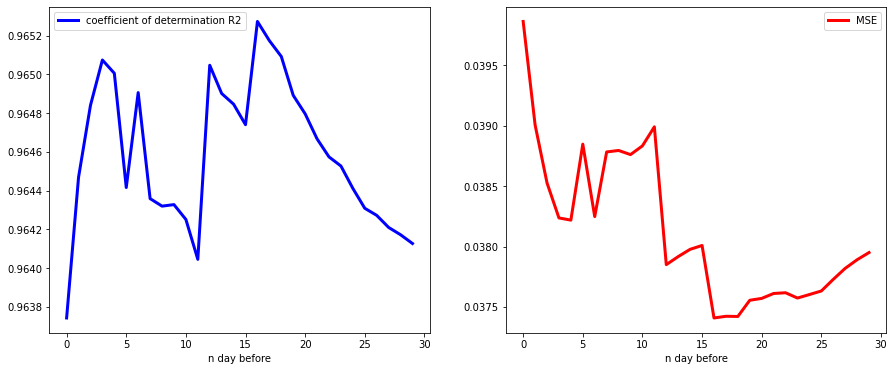

In [116]:
R_MSE = []
n=30
for i in range(n):
    X, Y = pv_X_Y(pv_train_set_new,i,False)
    R_MSE.append(linear_predict("pv",X,Y,False)[:2])
R_MSE = np.array(R_MSE).T
draw_R_MSE(R_MSE,n)

the result violate around, cannot see prominent improve

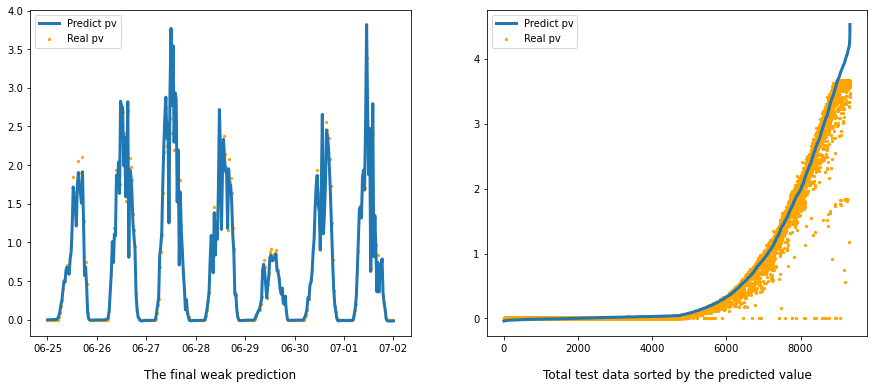

Coefficient of determination R2 is : 0.963743 and MSE is: 0.039862


In [285]:
X, Y = pv_X_Y(pv_train_set_new,0,False)
R2,MSE,pv_reg =  linear_predict("pv",X,Y,True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [286]:
# using the pv_reg to fill the na in pv column
fill_na("pv",0)

In [134]:
#output the fillna files
pv_train_set_new[["datetime","irradiance_Wm-2","pv_power_mw","panel_temp_C"]].to_csv("../data/Training_data_set4/pv_train_set4_fillna.csv",index=False)

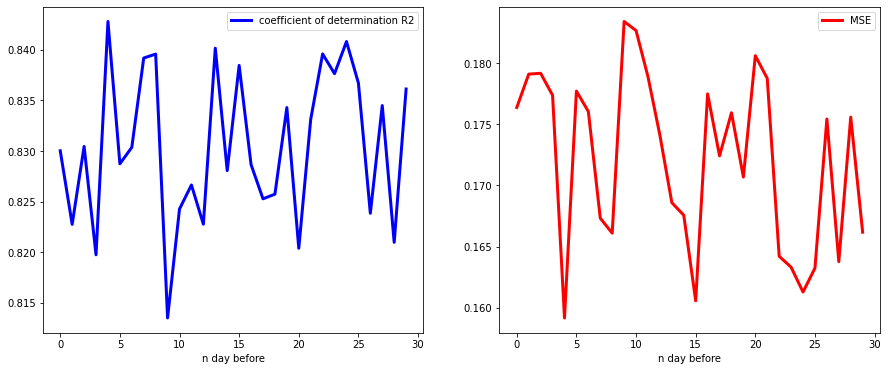

In [217]:
# using the weather data to predict the pv directly
choose_n_day('pv',True,30)

compare the two models predict by two step and by one steps

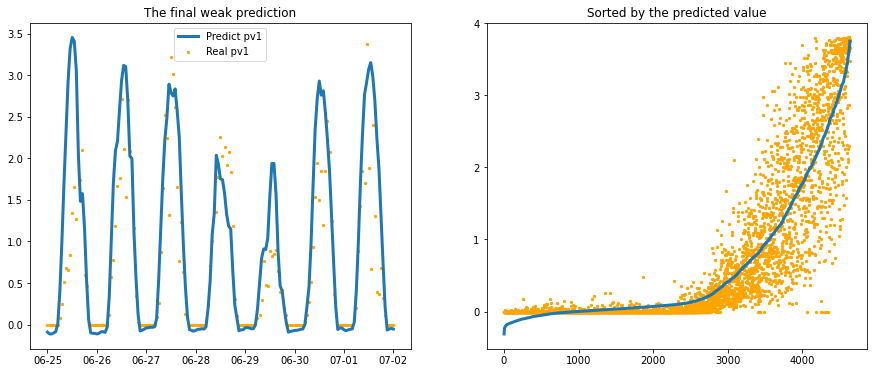

Coefficient of determination R2 is : 0.830015 and MSE is: 0.176364


In [19]:
X, Y = temp_sol_reg_data(True, pv_train_set.iloc[:,[0,2]],weather_train_set, False)
R2,MSE,pv_wether_reg =  linear_predict("pv1",X,Y,True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [247]:
X, Y = temp_sol_reg_data(False, pv_train_set.iloc[:,[0,2]],weather_train_set, False)
R2,MSE,pv_wether_reg1 =  linear_predict("pv1",X,Y,False)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

Coefficient of determination R2 is : 0.821719 and MSE is: 0.181386


In [222]:
pv_train_set_new_test = pv_train_set_new.copy(deep=True)
pv_train_set_new_test.iloc[-48*7-1:,[1,2,3]] = np.nan

In [232]:
fill_na("temp",2,pv_train_set_new_test)
fill_na("solar",0,pv_train_set_new_test)
fill_na("pv",0,pv_train_set_new_test)

the final weak Coefficient of determination R2 is : 0.400989,0.654621 and MSE is: 0.441704,0.426555


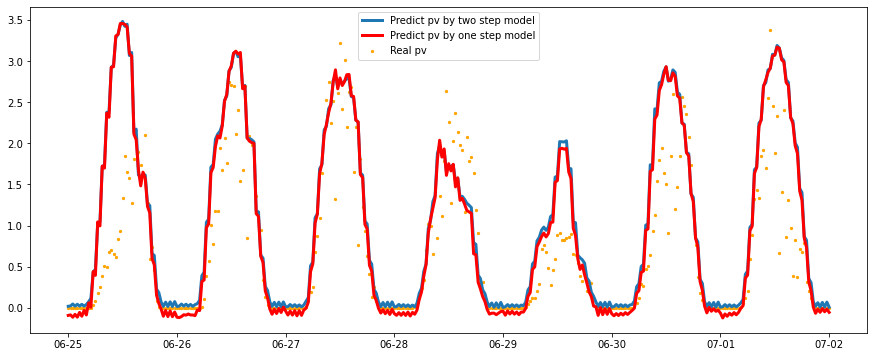

In [273]:
predict_one_step = pd.DataFrame(index=np.arange(48*7+1),columns=["predict"])
X = temp_sol_reg_data(True, pv_train_set.iloc[-48*7-1:,[0,2]],weather_train_set,True)
predict_one_step["predict"][predict_one_step.index%2==0 ] = pv_wether_reg.predict(X)
X = temp_sol_reg_data(False, pv_train_set.iloc[-48*7-1:,[0,2]],weather_train_set,True)
predict_one_step["predict"][predict_one_step.index%2!=0 ] = pv_wether_reg1.predict(X)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15, 6))
ax.plot(pv_train_set_new_test["pv_power_mw"][-48*7-1:].values, linewidth=3,label="Predict pv by two step model")
ax.plot(predict_one_step["predict"], linewidth=3,color="r", label="Predict pv by one step model")
ax.scatter(np.arange(48*7+1), pv_train_set_new["pv_power_mw"][-48*7-1:], c='orange', s=5, label="Real pv") 
ax.set_xticks(np.linspace(0,48*7,8))
xticks = pv_train_set["datetime"][-48*7-1:].reset_index(drop=True)
xticks = xticks[xticks.index.isin(np.linspace(0,48*7,8))].str[5:10].values
ax.set_xticklabels(xticks)
ax.legend() 

R21 = r2_score(pv_train_set_new["pv_power_mw"][-48*7-1:],pv_train_set_new_test["pv_power_mw"][-48*7-1:].values)
MSE1 = mean_squared_error(pv_train_set_new["pv_power_mw"][-48*7-1:],pv_train_set_new_test["pv_power_mw"][-48*7-1:].values)
R22 = r2_score(predict_one_step["predict"],pv_train_set_new["pv_power_mw"][-48*7-1:])
MSE2 = mean_squared_error(predict_one_step["predict"],pv_train_set_new["pv_power_mw"][-48*7-1:])
print("the final weak Coefficient of determination R2 is : %f,%f and MSE is: %f,%f" % (R21,R22,MSE1,MSE2))

## time series Start

In [293]:
pv_test_set = pd.read_csv("../data/test_set4/pv_test_set4.csv")
demand_test_set = pd.read_csv("../data/test_set4/demand_test_set4.csv")

In [26]:
# time series
import statsmodels.api as sm     #acf,pacf图
from statsmodels.tsa.stattools import adfuller  #adf检验
# from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA 

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# acf and pacf, default lags = 31
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(figsize=(15.,6))
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=lags, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=lags, ax=ax2)
    plt.show()

In [291]:
def add_time_variables(df_raw):
    df = df_raw.copy(deep=True)
    df["hour"] = df["datetime"].apply(calculate_hour)
    df["day"] = df["datetime"].apply(calculate_day)
    df['sin365'] = np.sin(2 * np.pi * df["day"] / 365.25)
    df['cos365'] = np.cos(2 * np.pi * df["day"] / 365.25)
    df['sin365_2'] = np.sin(4 * np.pi * df["day"] / 365.25)
    df['cos365_2'] = np.cos(4 * np.pi * df["day"] / 365.25)

    df['month'] = df["datetime"].str[5:7].astype(int)
    # avoid the data set only have part of the months
    df['month'] = pd.Categorical(df['month'],categories=np.arange(1,13))
    month_dummies = pd.get_dummies(df['month'],drop_first=True)
    month_dummies.columns = ['month_'+ str(m) for m in range(2,13)]
    df = pd.concat([df, month_dummies], axis=1).drop(columns=["day","month"],axis=1)
    
#     df['sin12'] = np.sin(2 * np.pi * df['month'] / 12)
#     df['cos12'] = np.cos(2 * np.pi * df['month'] / 12)
#     df['sin12_2'] = np.sin(4 * np.pi * df['month'] / 12)
#     df['cos12_2'] = np.cos(4 * np.pi * df['month'] / 12)  
#     df = df.drop(columns=["day","month"],axis=1)
    
    return df

In [288]:
def select_by_aic(X,Y):
    aics = []
    model_X = []
    # all columns
    results = sm.OLS(Y,X).fit()
    aics.append(results.aic)
    model_X.append(X.columns)
    # delete location i
    for column in filter(lambda x: re.match( r'(temp_location|solar_location)\d',x),X.columns):
        X_new = X.drop(columns=[column],axis=1)
        results = sm.OLS(Y.values,X_new.values).fit()
        aics.append(results.aic)
        model_X.append(X_new.columns)
    X_new =X.drop(columns=X.filter(regex="month-\d",axis=1).columns,axis=1)
    results = sm.OLS(Y.values,X_new.values).fit()
    aics.append(results.aic)
    model_X.append(X_new.columns)
    X_new =X.drop(columns=X.filter(regex="\S*365\S*",axis=1).columns,axis=1)
    results = sm.OLS(Y.values,X_new.values).fit()
    aics.append(results.aic)
    model_X.append(X_new.columns)
    return model_X[aics.index(min(aics))]

In [289]:
def lasso_regression(X_train, Y_train, X_test, Y_test):
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)
#     train_size = int(Y.shape[0]*0.8)
#     X_train, X_test, y_train, y_test = X[:train_size], X[train_size:],Y[:train_size], Y[train_size:]    
    from sklearn.linear_model import LassoCV
    lassoCV = LassoCV(alphas = [1e-7,1e-6,1e-5,0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],normalize = True, 
                max_iter = 50000, cv = 10)
    lassoCV.fit(X_train, Y_train)
    predict_Y = lassoCV.predict(X_test) 
    
    # Plot important coefficients
    coefs = pd.Series(lassoCV.coef_, index = X_train.columns)
    print("Lasso picked " + str(sum(abs(coefs) >=0.05)) + " features and eliminated the other " +  \
          str(sum(abs(coefs)<=0.05)) + " features, which are: " + ", ".join(coefs[abs(coefs)<=0.05].index.tolist()) + \
          " at the threshold 0.05 for coefficients of the variables")
    coefs = coefs[abs(coefs)>=0.05].sort_values()
    coefs.plot(kind = "barh")
    plt.title("Figure 12: Coefficients in the Lasso Model")
    plt.show()
    
    
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
    ax[0].plot(predict_Y, linewidth=3,label="Predict value")
    ax[0].scatter(np.arange(Y_test.shape[0]), Y_test.values.flatten(), c='orange', s=5, label="Real value") 
#     ax[0].set_xticks(np.linspace(0,48*7,8))
#     xticks = Y_test["datetime"].reset_index(drop=True)
#     xticks = xticks[xticks.index.isin(np.linspace(0,48*7,8))].str[5:10].values
#     ax[0].set_xticklabels(xticks)
    ax[0].legend() 
    ax[0].set_title("The final weak prediction")

    Y_predict_Y = pd.DataFrame({"predict_Y":predict_Y,"Y_test":Y_test.values.flatten()}).sort_values("predict_Y").reset_index()
    ax[1].plot(Y_predict_Y.index,Y_predict_Y.predict_Y, linewidth=3, label="Predict value")
    ax[1].scatter(Y_predict_Y.index, Y_predict_Y.Y_test, c='orange', s=5, label="Real value")
    ax[1].set_title("Sorted by the predicted value")
    plt.show()
    return mean_squared_error(Y_test,predict_Y)

In [100]:
def build_sarimax_model(X_train,Y_train,X_test, Y_test,hour_train,hour_test):
#     from functools import partial
    from multiprocessing.dummy import Pool
    Y_pred = pd.DataFrame(columns=["Y_pred"])
    
    arimaxs = []
    data_set = []
    for i in range(48):
        data_set.append([])
        data_set[i].append(X_train[hour_train==i])
        data_set[i].append(Y_train[hour_train==i])  
        data_set[i].append(X_test[hour_test==i])
        data_set[i].append(Y_test[hour_test==i])

    pool = Pool()
    results = pool.map(pool_pv, data_set)
    pool.close()
    pool.join()
    for i,result in enumerate(results):
        Y_pred = pd.concat([Y_pred, pd.DataFrame(data={"Y_pred":result[0]},index=data_set[i][3].index)],axis=0)
        arimaxs.append(result[1])

    Y_pred.sort_index(inplace=True)
    return Y_pred, arimaxs

In [101]:
def pool_pv(dataset):
    exog_train, ts_train, exog_test, ts_test = dataset[0],dataset[1],dataset[2],dataset[3]
    # if 99% of the data is 0, than we predict that all the data is 0. This will predict many hours of solar data to 0
    if (ts_train==0).astype(int).sum()[0] > ts_train.shape[0]*0.99:
        arimax = 0
#             ts_test = ts[train_size:]
        test_pred = np.zeros(ts_test.shape[0])            
    else:

        resDiff = sm.tsa.arma_order_select_ic(ts_train.diff().dropna(), max_ar=6, max_ma=3, ic='aic', trend='c')
        p,q = resDiff['aic_min_order']
#         p,q = 2,2
        arimax = sm.tsa.arima.ARIMA(ts_train,exog=exog_train,order=(p,1,q), enforce_stationarity=False, enforce_invertibility=False).fit()
        test_pred = arimax.forecast(ts_test.shape[0],exog = exog_test.values).values
    
    return test_pred, arimax

In [102]:
def month_mean_plot(df):
    temp_date_df = df.set_index("datetime")
    # index must be the Datetime tpye to use the timeseries method in pandas
    temp_date_df.index = pd.DatetimeIndex(temp_date_df.index)
    monthly_mean = temp_date_df.resample('M').mean()
    plt.figure(figsize=(10,6))
    plt.plot(monthly_mean)
    plt.scatter(monthly_mean.index,monthly_mean)
    plt.title("monthly average " + temp_date_df.columns[0], y=-0.15)

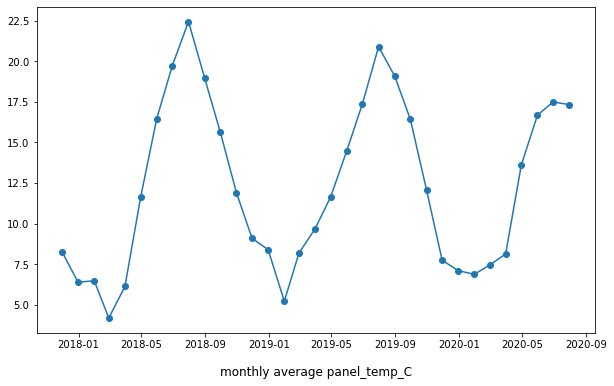

In [34]:
month_mean_plot(pv_train_set_new[["datetime","panel_temp_C"]])

It shows that there has monthly difference of the temperature, and it roughly follows a yearly cycle. Thus, we add the month dummy variables and the daily Fourier transform variables to our model

In [271]:
def produce_X_Y(pv_df, weather_df):
    pv_df = add_time_variables(pv_df)

    weather_df["datetime"] = weather_df["datetime"].str[:13]
    pv_df["datetime"] = pv_df["datetime"].str[:13]
    joined_data = pv_df.join(weather_df.set_index("datetime"),on="datetime", how="left")

    # joined_data.index = pd.DatetimeIndex(joined_data.index.str[:10])
    # joined_data.dropna(how="any",axis=0,inplace=True)
    Y, X = joined_data.filter(items=["Y"],axis=1), joined_data.drop(columns=["Y","hour","datetime"],axis=1)
    hour = joined_data["hour"]    
    return X,Y,hour


In [305]:
pv_df = pv_train_set_new[["datetime","panel_temp_C"]].copy(deep=True).rename(columns={"panel_temp_C":"Y"})
weather_df = temp_weather_df.copy(deep=True)
X_temp_train, Y_temp_train, hour_train = produce_X_Y(pv_df, weather_df)
pv_df = pv_test_set[["datetime","panel_temp_C"]].copy(deep=True).rename(columns={"panel_temp_C":"Y"})
X_temp_test, Y_temp_test, hour_test = produce_X_Y(pv_df, weather_df)

X_temp_total = pd.concat([X_temp_train,X_temp_test],axis=0)
Y_temp_total = pd.concat([Y_temp_train,Y_temp_test],axis=0)

In [306]:
X_temp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46704 entries, 0 to 46703
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sin365          46704 non-null  float64
 1   cos365          46704 non-null  float64
 2   sin365_2        46704 non-null  float64
 3   cos365_2        46704 non-null  float64
 4   sin12           46704 non-null  float64
 5   cos12           46704 non-null  float64
 6   sin12_2         46704 non-null  float64
 7   cos12_2         46704 non-null  float64
 8   temp_location1  46704 non-null  float64
 9   temp_location2  46704 non-null  float64
 10  temp_location3  46704 non-null  float64
 11  temp_location4  46704 non-null  float64
 12  temp_location5  46704 non-null  float64
 13  temp_location6  46704 non-null  float64
dtypes: float64(14)
memory usage: 5.0 MB


In [30]:
# pv_df = pv_train_set_new[["datetime","panel_temp_C"]].copy(deep=True).rename(columns={"panel_temp_C":"Y"})
# weather_df = temp_weather_df.copy(deep=True)

# pv_df = add_time_variables(pv_df)

# weather_df["datetime"] = weather_df["datetime"].str[:13]
# pv_df["datetime"] = pv_df["datetime"].str[:13]
# joined_data = pv_df.join(weather_df.set_index("datetime"),on="datetime", how="left")

# # joined_data.index = pd.DatetimeIndex(joined_data.index.str[:10])
# # joined_data.dropna(how="any",axis=0,inplace=True)
# Y_temp, X_temp = joined_data.filter(items=["Y"],axis=1), joined_data.drop(columns=["Y","hour","datetime"],axis=1)
# hour = joined_data["hour"]

In [46]:
import statsmodels.api as sm
results = sm.OLS(Y_temp_train, X_temp_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                          2.599e+04
Date:                Tue, 29 Jun 2021   Prob (F-statistic):                        0.00
Time:                        12:39:35   Log-Likelihood:                     -1.3331e+05
No. Observations:               46668   AIC:                                  2.667e+05
Df Residuals:                   46647   BIC:                                  2.668e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sin365             0.5992      0.177      3.382      0.001       0.252       0.946
cos365             5.6991      0.138     41.270      0.000       5.428       5.970
sin365_2          -0.3687      0.094     -3.912      0.000      -0.553      -0.184
cos365_2           1.1458      0.094     12.254      0.000       0.963       1.329
month-2            2.8770      0.148     19.468      0.000       2.587       3.167
month-3            5.8200      0.224     26.039      0.000       5.382       6.258
month-4            7.9767      0.273     29.212      0.000       7.442       8.512
month-5           10.4618      0.292     35.839      0.000       9.890      11.034
month-6           11.0354      0.295     37.375      0.000      10.457      11.614
month-7           12.2610      0.308     39.749      0.000      11.656      12.866
month-8           11.7360      0.301     38.977      0.000      11.146      12.326
month-9           10.4503      0.300     34.885      0.000       9.863      11.037
month-10           7.5802      0.281     26.948      0.000       7.029       8.132
month-11           3.5047      0.232     15.112      0.000       3.050       3.959
month-12           0.6984      0.154      4.546      0.000       0.397       1.000
temp_location1     2.8444      0.066     42.951      0.000       2.715       2.974
temp_location2     1.7239      0.055     31.603      0.000       1.617       1.831
temp_location3    -1.6517      0.046    -36.175      0.000      -1.741      -1.562
temp_location4     0.6499      0.022     29.932      0.000       0.607       0.692
temp_location5    -2.3080      0.085    -27.017      0.000      -2.475      -2.141
temp_location6    -0.4790      0.081     -5.888      0.000      -0.638      -0.320
==============================================================================
Omnibus:                     6650.122   Durbin-Watson:                   0.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13371.350
Skew:                           0.884   Prob(JB):                         0.00
Kurtosis:                       4.937   Cond. No.                         925.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The P values of the t-test for variables are all less than 0.05, which means the variable are all significant. The P values of the F-test for the model is very small, which means this model is significant. 

In [307]:
select_by_aic(X_temp_train,Y_temp_train)

Index(['sin365', 'cos365', 'sin365_2', 'cos365_2', 'sin12', 'cos12', 'sin12_2',
       'cos12_2', 'temp_location1', 'temp_location2', 'temp_location3',
       'temp_location4', 'temp_location5', 'temp_location6'],
      dtype='object')

Lasso picked 12 features and eliminated the other 2 features, which are: sin12, cos12 at the threshold 0.05 for coefficients of the variables


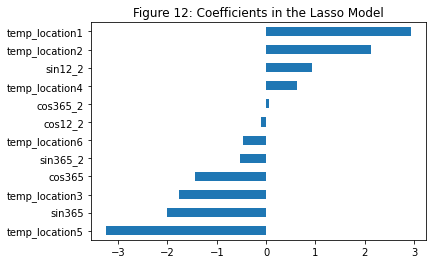

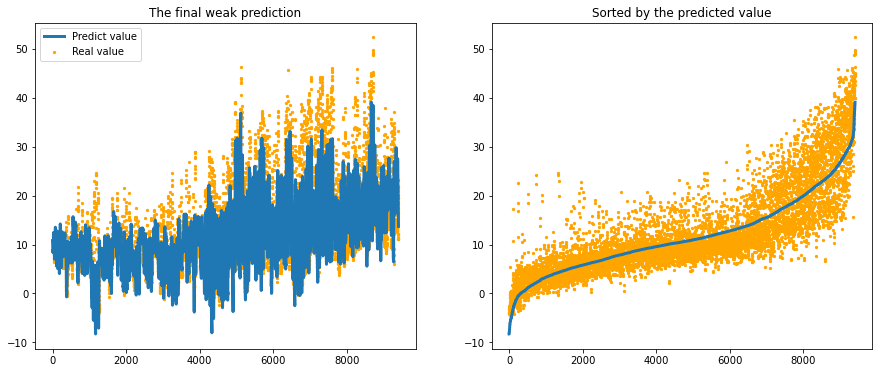

17.915960570287965

In [308]:
train_size = int(Y_temp_total.shape[0]*0.8)
X_train, X_test, y_train, y_test = X_temp_total[:train_size], X_temp_total[train_size:],Y_temp_total[:train_size], Y_temp_total[train_size:]  
lasso_regression(X_train, y_train, X_test, y_test)

We try to use the aic to choose the most suitable variable sets, which also suggests that we should use all the variables.

lasso regression also selects all the variables if we choose the variables whose estimated coefficient is greater than 0.05

In [78]:
Y_pred_temp, arimaxs = build_sarimax_model(X_temp_train,Y_temp_train,X_temp_test, Y_temp_test,hour_train,hour_test)        

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Ana

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\lang

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [79]:
for i,model in enumerate(arimaxs):
    model.save("./model/temperature/temp_"+str(i)+".pickle") 

In [36]:
for arimax in arimaxs:
    print(arimax.model_orders)

{'trend': 0, 'exog': 21, 'ar': 0, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 0, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
{'trend': 0, 'exog': 21, 'ar': 1, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
{'trend': 0, 'exog': 21, 'ar': 1, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
{'trend': 0, 'exog': 21, 'ar': 1, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
{'trend': 0, 'exog': 21, 'ar': 1, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
{'trend': 0, 'exog': 21, 'ar': 1, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 2, 'exog_varian

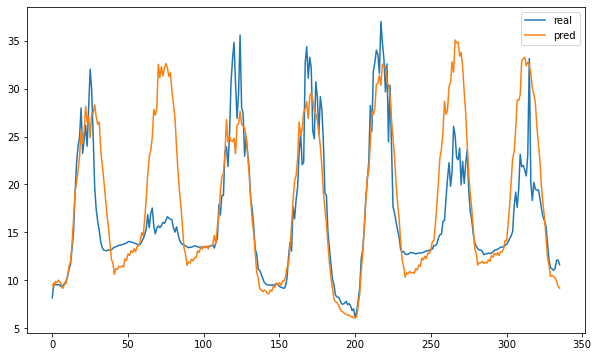

In [76]:
# Y_test_temp.dropna(inplace=True)
# Y_pred_temp.dropna(inplace=True)
plt.figure(figsize=(10,6))
plt.plot(pd.DataFrame({'test':Y_temp_test.values.reshape(1,-1)[0],'pred':Y_pred_temp.values.reshape(1,-1)[0]}))
plt.legend(["real","pred"])
plt.show()

In [82]:
print('ARIMAX model MSE for temperature:{}'.format(mean_squared_error(Y_temp_test,Y_pred_temp)))

ARIMAX model MSE for temperature:26.48492313937986


If we build one model for the whole data, we can see from the acf and pacf, no matter how many differencing we use,the data still have more than 50 orders of the autoregressive and moving average components. Thus, we try to decompose the model into 48 sub-models to deal with each half hour data.
We use the data of 00:00:00 each day as an example. The data now have less orders of the autoregressive and moving average components. If we make the first-order difference,the patterm is more pretty.The second-order difference have very little improvement,thus, we finally choose to use the first-order difference on this data.We use aic to choose the order of autoregressive and moving average components and get 3 and 2 respectively

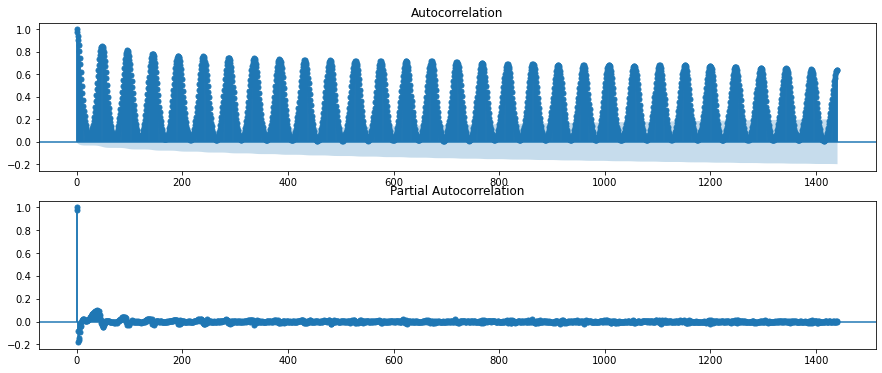

In [36]:
# draw a month of the data
draw_acf_pacf(Y_temp.values, lags=30*48) # irradiance_Wm-2   panel_temp_C  pv_power_mw

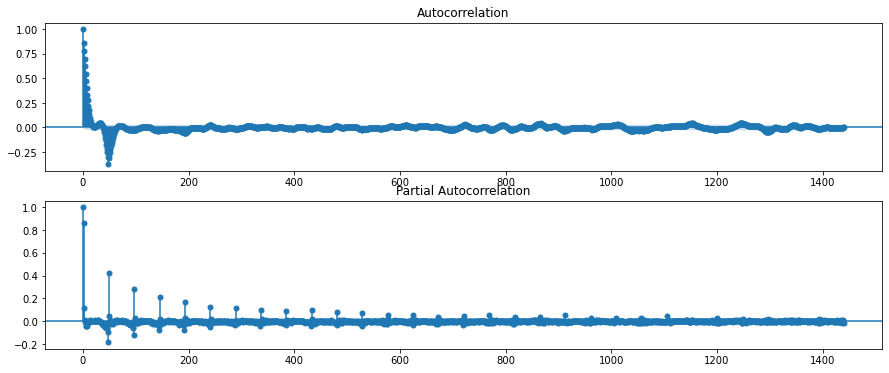

In [37]:
draw_acf_pacf(Y_temp.diff(periods=48).dropna(), lags=30*48) # irradiance_Wm-2   panel_temp_C  pv_power_mw

temperature variables have significant seasonal variation for period about 48. One order differencing can not remove it, and there are still long lags for both acf and pacf. So we try to use 48 models seperately for each half hour. We take the data at 00:00:00 for example.

In [81]:
# temp_00 = pv_train_set_new[pv_train_set_new["datetime"].str[-8:]=="13:30:00"][["datetime","panel_temp_C"]]
# temp_00.rename(columns={"panel_temp_C":"Y"},inplace=True)
# exog, temp_00 = hour_reg_data(temp_00, temp_weather_df)
temp_00 = Y_temp[hour==0]
exog = X_temp[hour==0]

In [73]:
res = sm.tsa.adfuller(temp_00.dropna())
print('p-value:{}'.format(res[1]))

p-value:0.15193988374080275


In [72]:
res = sm.tsa.adfuller(temp_00.diff().dropna())
print('p-value:{}'.format(res[1]))

p-value:4.074918426016882e-21


The result shows that the p-value for ADF test of the original data is bigger than 0.05, but the p-values of one order diffenencing data is very small. Thus, we can reject the assumption that there is a unit root in a the one order differencing process.
When Original-data is not stationary and Diff-data is stationary,the time series is called unit root process. For unit root process, We use ARIMA or SARIMA model.

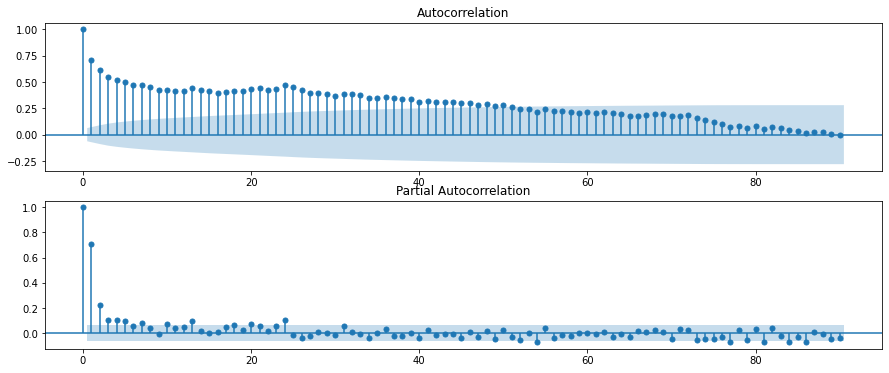

In [27]:
draw_acf_pacf(temp_00, lags=90)

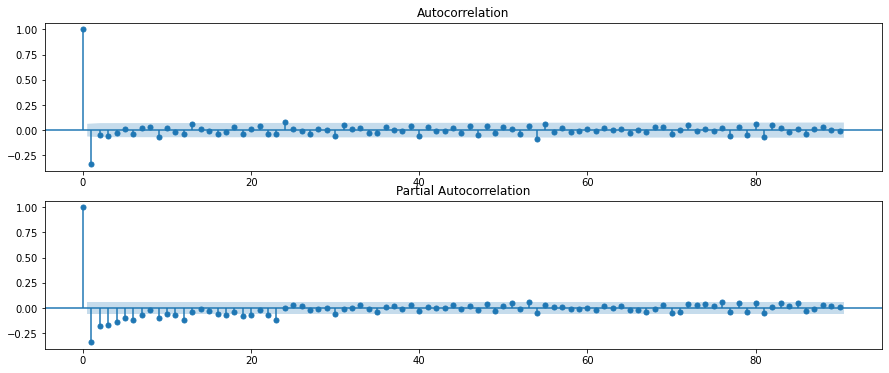

In [144]:
draw_acf_pacf(temp_00.diff().dropna(), lags=90)

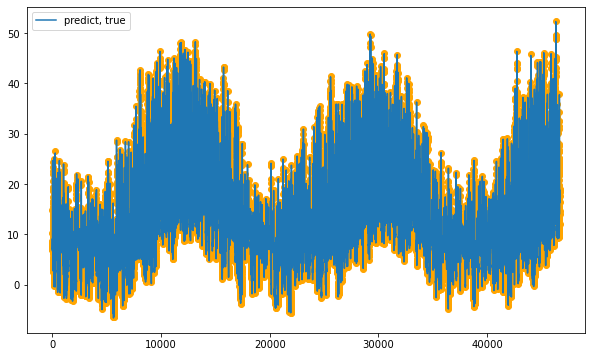

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit3 = ExponentialSmoothing(temp_ts["panel_temp_C"].values[:-7], seasonal_periods=4, trend='add', seasonal='add', damped=True).fit()
plt.figure(figsize=(10,6))
plt.plot(fit3.fittedvalues)
plt.scatter(np.arange(temp_ts.shape[0])[:-7],temp_ts["panel_temp_C"].values[:-7], color="orange")
plt.legend(["predict, true"])

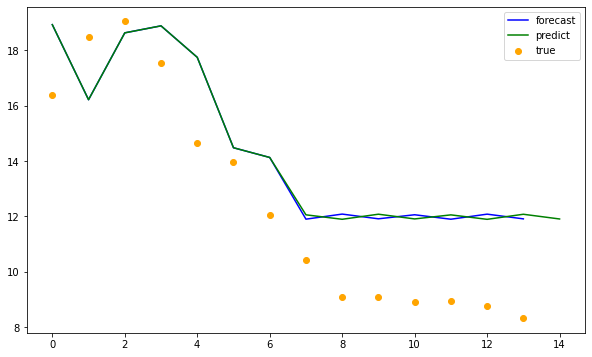

In [37]:
plt.figure(figsize=(10,6))
plt.plot(list(fit3.fittedvalues[-7:]) + list(fit3.forecast(7)), color="b")
plt.plot(list(fit3.fittedvalues[-7:]) + list(fit3.predict(temp_ts.shape[0],temp_ts.shape[0]+7)), color="g")
plt.scatter(np.arange(14),temp_ts["panel_temp_C"][-14:], color="orange")
plt.legend(["forecast","predict", "true"])

check the 0 o'clock and 13:30, the plots show the similar pattern

In [82]:
train_size = int(temp_00.shape[0]*0.8)
exog_train, temp_00_train, exog_test, temp_00_test = exog[:train_size], temp_00[:train_size],exog[train_size:], temp_00[train_size:]

In [146]:
resDiff = sm.tsa.arma_order_select_ic(temp_00.diff().dropna(), max_ar=10, max_ma=3, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (3, 2) is the best.


In [34]:
arima_00 = sm.tsa.arima.ARIMA(temp_00_train,exog=exog_train,order=(3,1,2), enforce_stationarity=False, enforce_invertibility=False).fit()
arima_00.summary()

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                  778
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1346.953
Date:                Wed, 30 Jun 2021   AIC                           2747.905
Time:                        10:47:39   BIC                           2873.498
Sample:                             0   HQIC                          2796.227
                                - 778                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
sin365            -0.6164      0.527     -1.169      0.242      -1.650       0.417
cos365             0.3744      0.591      0.633      0.527      -0.784       1.533
sin365_2           0.0115      0.268      0.043      0.966      -0.513       0.536
cos365_2           0.1937      0.264      0.733      0.464      -0.324       0.712
month-2            0.8581      0.501      1.711      0.087      -0.125       1.841
month-3            1.2758      0.789      1.617      0.106      -0.270       2.822
month-4            1.1803      0.960      1.230      0.219      -0.701       3.061
month-5           -0.1633      1.082     -0.151      0.880      -2.285       1.958
month-6           -0.6858      1.108     -0.619      0.536      -2.858       1.487
month-7           -1.9816      1.080     -1.834      0.067      -4.099       0.136
month-8           -1.7740      1.038     -1.710      0.087      -3.808       0.260
month-9           -1.5419      0.986     -1.564      0.118      -3.474       0.390
month-10          -1.1124      0.884     -1.258      0.208      -2.845       0.620
month-11          -0.6900      0.703     -0.982      0.326      -2.068       0.688
month-12          -0.2725      0.446     -0.611      0.541      -1.146       0.601
temp_location1     1.4567      0.143     10.196      0.000       1.177       1.737
temp_location2     0.4772      0.135      3.541      0.000       0.213       0.741
temp_location3    -0.5839      0.102     -5.712      0.000      -0.784      -0.384
temp_location4     0.2165      0.052      4.157      0.000       0.114       0.319
temp_location5    -0.7339      0.246     -2.987      0.003      -1.215      -0.252
temp_location6     0.3774      0.242      1.557      0.120      -0.098       0.853
ar.L1             -0.7013      0.345     -2.032      0.042      -1.378      -0.025
ar.L2              0.0709      0.048      1.492      0.136      -0.022       0.164
ar.L3             -0.0012      0.002     -0.647      0.518      -0.005       0.002
ma.L1             -0.2108      0.355     -0.594      0.552      -0.906       0.485
ma.L2             -0.7886      0.352     -2.240      0.025      -1.479      -0.099
sigma2             1.8878      0.160     11.792      0.000       1.574       2.202
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                54.22
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.51
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
arima_00.model_orders

{'trend': 0,
 'exog': 21,
 'ar': 3,
 'ma': 2,
 'seasonal_ar': 0,
 'seasonal_ma': 0,
 'reduced_ar': 3,
 'reduced_ma': 2,
 'exog_variance': 0,
 'measurement_variance': 0,
 'variance': 1}

Ljing-Box value is small, and the P values of it is bigger than 0.1, thus, we can not reject the assumption that the autocorrelations of the residuals of the model are all near zero. 
Jarque-Bera test's Prob is less than 0.05, which means this model's resid is not following a normal distribution. Some infomations may still remain in this model's resid. 

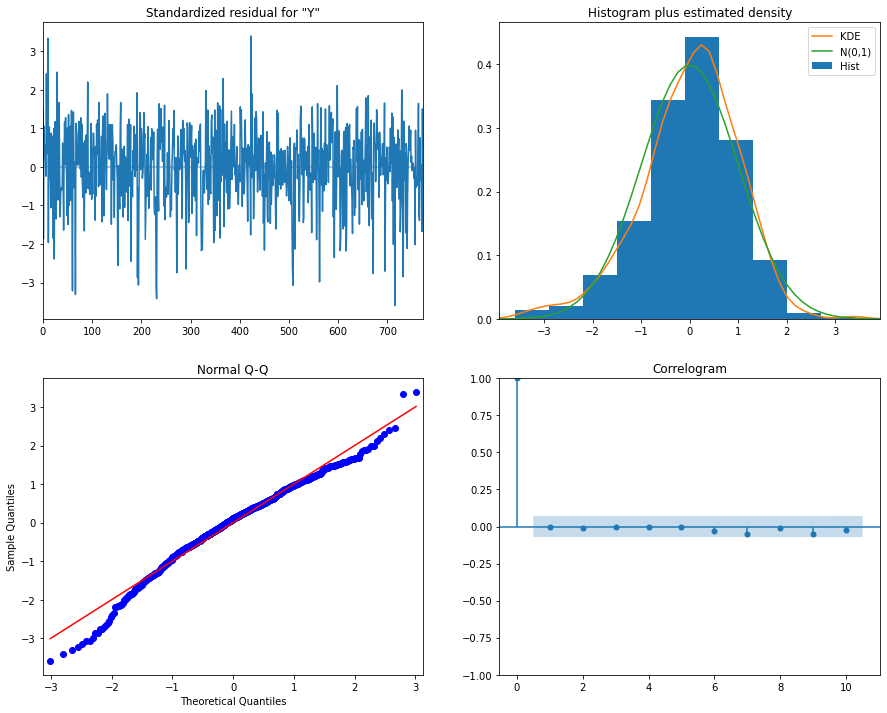

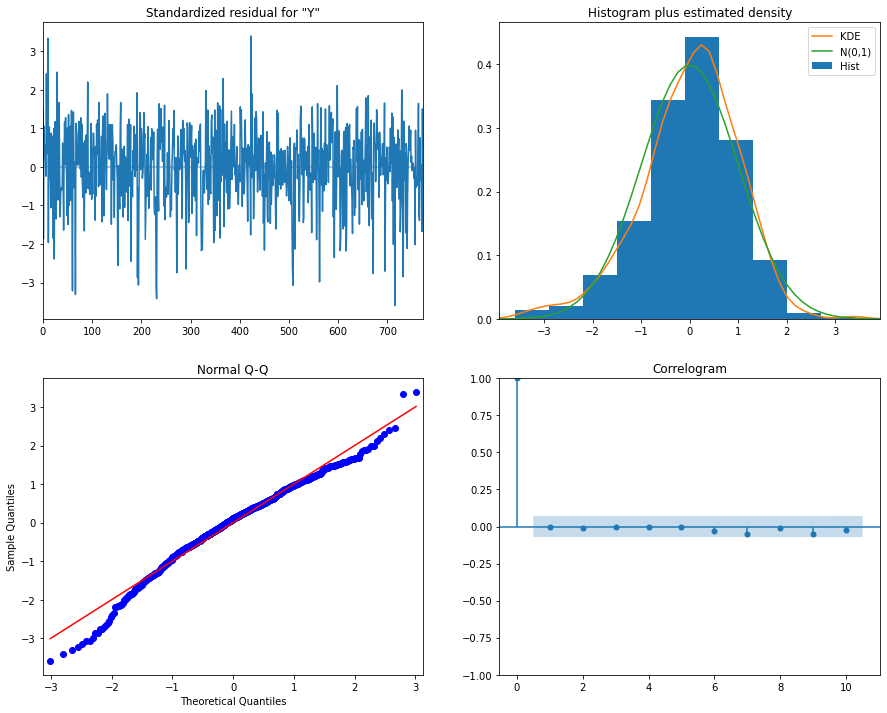

In [70]:
arima_00.plot_diagnostics(figsize=(15, 12))

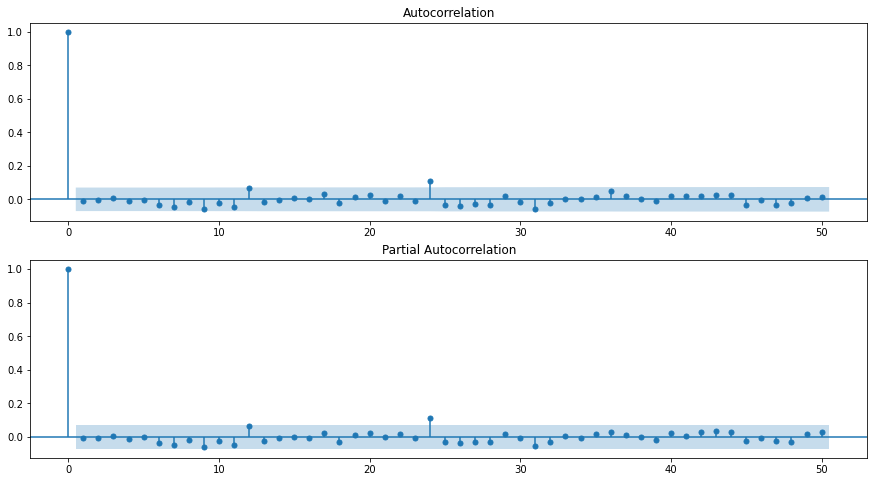

In [68]:
res = arima_00.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

From the acf and pacf plots, we can conclude that there are hardly ever autocorrelation among the residuals, thus, the information contained in the residuals can not extracted by our current model.

In [93]:
pred = arima_00.forecast(exog_test.shape[0],exog = exog_test.values)
print('ARIMA model MSE:{}'.format(mean_squared_error(temp_00_test,pred)))

ARIMA model MSE:1.7487685742275243


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


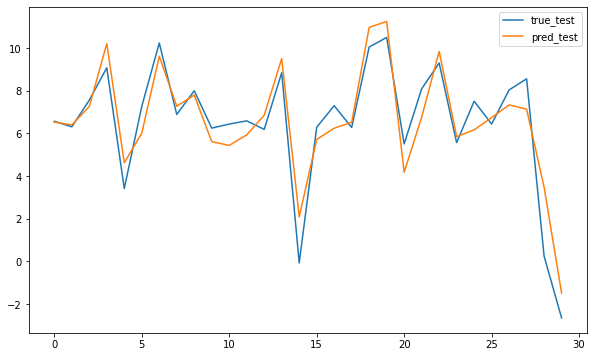

In [72]:
plt.figure(figsize=(10,6))
plt.plot(pd.DataFrame({'test':temp_00_test.values.reshape(1,-1)[0],'pred':pred.values.reshape(1,-1)[0]})[:30])
plt.legend(["true_test","pred_test"])
plt.show()

even two order of difference are still not stationary

since we can only use the data after the 48 half hours,though the acf plots converge after about 60 periods, it is hardly for us to use MA models. We can use the AR model with at least variables as possible.

We do the same job for the solar data

In [309]:
pv_df = pv_train_set_new[["datetime","irradiance_Wm-2"]].copy(deep=True).rename(columns={"irradiance_Wm-2":"Y"})
weather_df = sol_weather_df.copy(deep=True)
X_sol_train, Y_sol_train, hour_train = produce_X_Y(pv_df, weather_df)
pv_df = pv_test_set[["datetime","irradiance_Wm-2"]].copy(deep=True).rename(columns={"irradiance_Wm-2":"Y"})
X_sol_test, Y_sol_test, hour_test = produce_X_Y(pv_df, weather_df)

In [310]:
X_sol_total = pd.concat([X_sol_train,X_sol_test],axis=0)
Y_sol_total = pd.concat([Y_sol_train,Y_sol_test],axis=0)

In [29]:
# pv_df = pv_train_set_new[["datetime","irradiance_Wm-2"]].copy(deep=True).rename(columns={"irradiance_Wm-2":"Y"})
# weather_df = sol_weather_df.copy(deep=True)

# pv_df = add_time_variables(pv_df)

# weather_df["datetime"] = weather_df["datetime"].str[:13]
# pv_df["datetime"] = pv_df["datetime"].str[:13]
# joined_data = pv_df.join(weather_df.set_index("datetime"),on="datetime", how="left")

# # joined_data.index = pd.DatetimeIndex(joined_data.index.str[:10])
# # joined_data.dropna(how="any",axis=0,inplace=True)
# Y_sol, X_sol = joined_data.filter(items=["Y"],axis=1), joined_data.drop(columns=["Y","hour","datetime"],axis=1)
# hour = joined_data["hour"]

In [311]:
results = sm.OLS(Y_sol_total,X_sol_total).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                          2.252e+04
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        23:44:58   Log-Likelihood:                     -2.8616e+05
No. Observations:               47040   AIC:                                  5.724e+05
Df Residuals:                   47026   BIC:                                  5.725e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sin365            -10.9782      4.521     -2.428      0.015     -19.839      -2.118
cos365             27.4686      4.737      5.799      0.000      18.184      36.753
sin365_2          -12.5157      2.331     -5.369      0.000     -17.085      -7.947
cos365_2           -9.6062      2.348     -4.091      0.000     -14.209      -5.004
sin12              16.6647      4.489      3.712      0.000       7.866      25.464
cos12              -5.3782      4.757     -1.131      0.258     -14.702       3.946
sin12_2             7.7617      2.318      3.348      0.001       3.218      12.306
cos12_2            -6.7910      2.361     -2.877      0.004     -11.418      -2.164
solar_location1     0.2186      0.026      8.559      0.000       0.169       0.269
solar_location2     0.1484      0.027      5.406      0.000       0.095       0.202
solar_location3     0.2019      0.021      9.812      0.000       0.162       0.242
solar_location4     0.0437      0.011      4.113      0.000       0.023       0.065
solar_location5     0.1489      0.021      7.021      0.000       0.107       0.190
solar_location6     0.2716      0.020     13.252      0.000       0.231       0.312
==============================================================================
Omnibus:                     5461.389   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55579.688
Skew:                          -0.084   Prob(JB):                         0.00
Kurtosis:                       8.322   Cond. No.                     9.08e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

t-test of the OLS suggestes the variables month-5,month-7,month-8 are not significant

In [312]:
select_by_aic(X_sol_total,Y_sol_total)

Index(['sin365', 'cos365', 'sin365_2', 'cos365_2', 'sin12', 'cos12', 'sin12_2',
       'cos12_2', 'solar_location1', 'solar_location2', 'solar_location3',
       'solar_location4', 'solar_location5', 'solar_location6'],
      dtype='object')

We try to use the aic to choose the most suitable variable sets, which also suggests that we should use all the variables.

Lasso picked 8 features and eliminated the other 6 features, which are: sin365, sin365_2, cos12, sin12_2, cos12_2, solar_location4 at the threshold 0.05 for coefficients of the variables


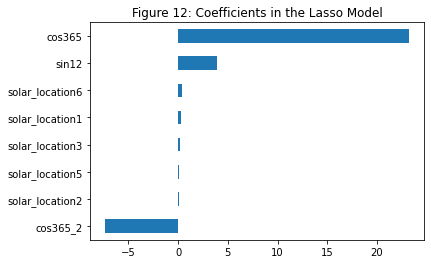

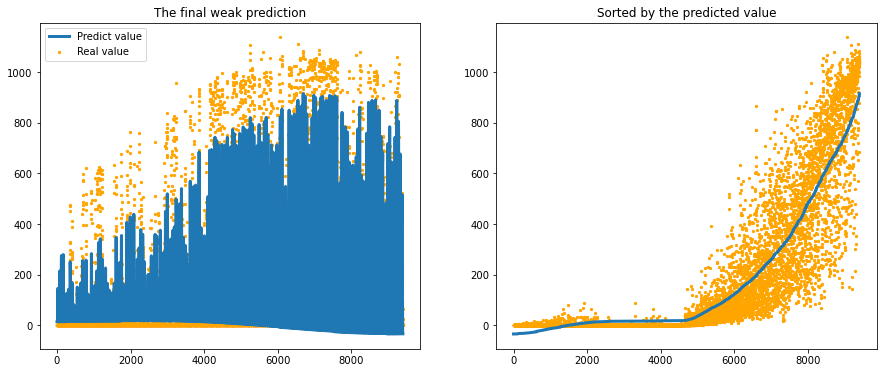

11866.438382760001

In [313]:
train_size = int(Y_sol_total.shape[0]*0.8)
X_train, X_test, y_train, y_test = X_sol_total[:train_size], X_sol_total[train_size:],Y_sol_total[:train_size], Y_sol_total[train_size:]  
lasso_regression(X_train, y_train, X_test, y_test)

In [91]:
models = ["with all variables","delete the unsignificant variables by t-test","delete the variables by L1 penalty"]
MSEs = []
MSEs.append(mean_squared_error(Y_sol_total.values,sm.OLS(Y_sol_total.values,X_sol_total.values).fit().predict(X_sol_total.values)))
X_new =X_sol_total.drop(columns=["month_5","month_7","month_8"],axis=1)
MSEs.append(mean_squared_error(Y_sol_total.values,sm.OLS(Y_sol_total.values,X_new.values).fit().predict(X_new.values)))
X_new =X_sol_total.drop(columns=["sin365_2", "month_3", "month_5", "month_7", "month_8", "month_10", "month_11", "month_12", "solar_location4"],axis=1)
MSEs.append(mean_squared_error(Y_sol_total.values,sm.OLS(Y_sol_total.values,X_new.values).fit().predict(X_new.values)))
for i in range(3):
    print("The MSE of the model %s is: %.3f " % (models[i], MSEs[i]))
for i in range(2):
    print("Comparing to the model %s, the model %s increases %.5f " % (models[0], models[i+1], (MSEs[i+1]-MSEs[0])/MSEs[0]))

The MSE of the model with all variables is: 11234.716 
The MSE of the model delete the unsignificant variables by t-test is: 11234.949 
The MSE of the model delete the variables by L1 penalty is: 11260.347 
Comparing to the model with all variables, the model delete the unsignificant variables by t-test increases 0.00002 
Comparing to the model with all variables, the model delete the variables by L1 penalty increases 0.00228 


We calculates the MSE for the the models with three kinds of variables set, the results shows there are very little difference if we remove some variables selected by unsignificant variables and L1 penalty. Thus, we choose the variable set with less variables.

In [92]:
X_sol_total = X_sol_total.drop(columns=["sin365_2", "month_3", "month_5", "month_7", "month_8", "month_10", "month_11", "month_12", "solar_location4"],axis=1)

In [316]:
sol_13 = Y_sol_train[hour_train==13]
exog = X_sol_train[hour_train==13]

In [317]:
train_size = int(sol_13.shape[0]*0.8)
exog_train, sol_13_train, exog_test, sol_13_test = exog[:train_size], sol_13[:train_size],exog[train_size:], sol_13[train_size:]

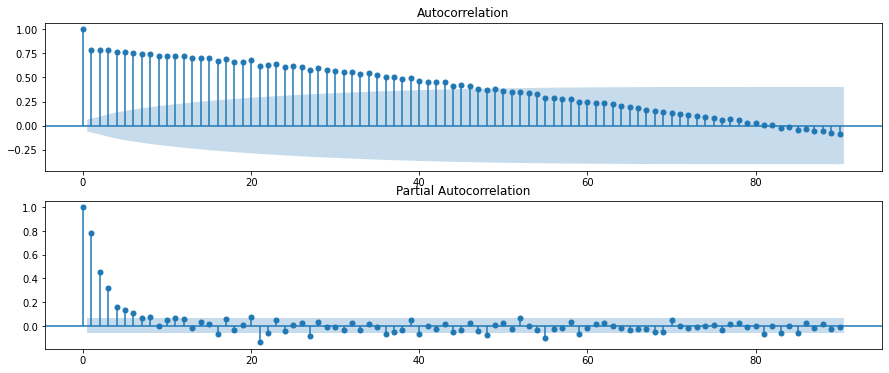

In [318]:
draw_acf_pacf(sol_13, lags=90)

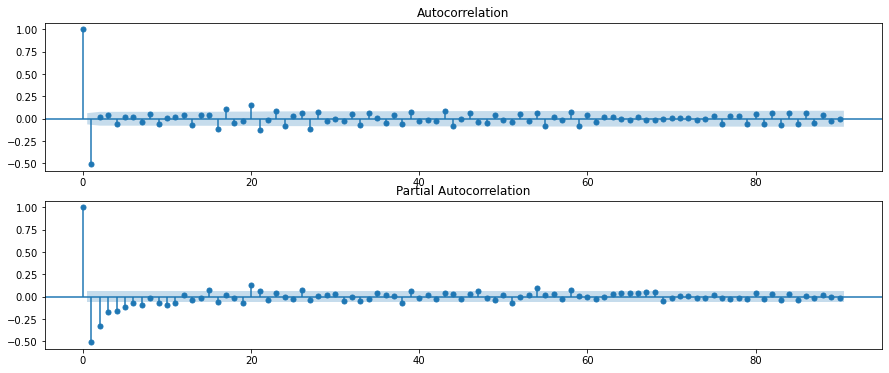

In [38]:
draw_acf_pacf(sol_13.diff().dropna(), lags=90)

In [319]:
resDiff = sm.tsa.arma_order_select_ic(sol_13.diff().dropna(), max_ar=10, max_ma=4, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARMA(p,q) = (2, 3) is the best.


In [40]:
arima_13 = sm.tsa.arima.ARIMA(sol_13_train,exog=exog_train,order=(2,1,3), enforce_stationarity=False, enforce_invertibility=False).fit()
arima_13.summary()

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                  778
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -3798.727
Date:                Fri, 02 Jul 2021   AIC                           7633.453
Time:                        15:58:24   BIC                           7717.158
Sample:                             0   HQIC                          7665.661
                                - 778                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sin365             -2.8001     20.757     -0.135      0.893     -43.484      37.884
cos365            -12.9178     42.858     -0.301      0.763     -96.918      71.082
cos365_2           -1.8192     19.922     -0.091      0.927     -40.865      37.227
month_2             0.0889    171.959      0.001      1.000    -336.945     337.123
month_4            47.1816      7.366      6.406      0.000      32.745      61.618
month_6            19.8318      5.857      3.386      0.001       8.353      31.311
month_9           -26.0655     12.383     -2.105      0.035     -50.337      -1.794
solar_location1    -0.1019      0.077     -1.322      0.186      -0.253       0.049
solar_location2     0.2249      0.084      2.685      0.007       0.061       0.389
solar_location3     0.3201      0.062      5.130      0.000       0.198       0.442
solar_location5     0.1604      0.069      2.324      0.020       0.025       0.296
solar_location6     0.0509      0.068      0.746      0.456      -0.083       0.185
ar.L1              -1.2587      0.021    -59.655      0.000      -1.300      -1.217
ar.L2              -0.9670      0.022    -43.925      0.000      -1.010      -0.924
ma.L1               0.4820      0.027     17.747      0.000       0.429       0.535
ma.L2              -0.0685      0.032     -2.167      0.030      -0.130      -0.007
ma.L3              -0.7882      0.026    -29.864      0.000      -0.840      -0.736
sigma2           1094.1990     39.236     27.888      0.000    1017.298    1171.100
===================================================================================
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):               664.19
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.25
Prob(H) (two-sided):                  0.22   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ljing-Box value is small, and the P values of it is bigger than 0.1, thus, we can not reject the assumption that the autocorrelations of the residuals of the model are all near zero. 
Jarque-Bera test's Prob is less than 0.05, which means this model's resid is not following a normal distribution. Some infomations may still remain in this model's resid. 

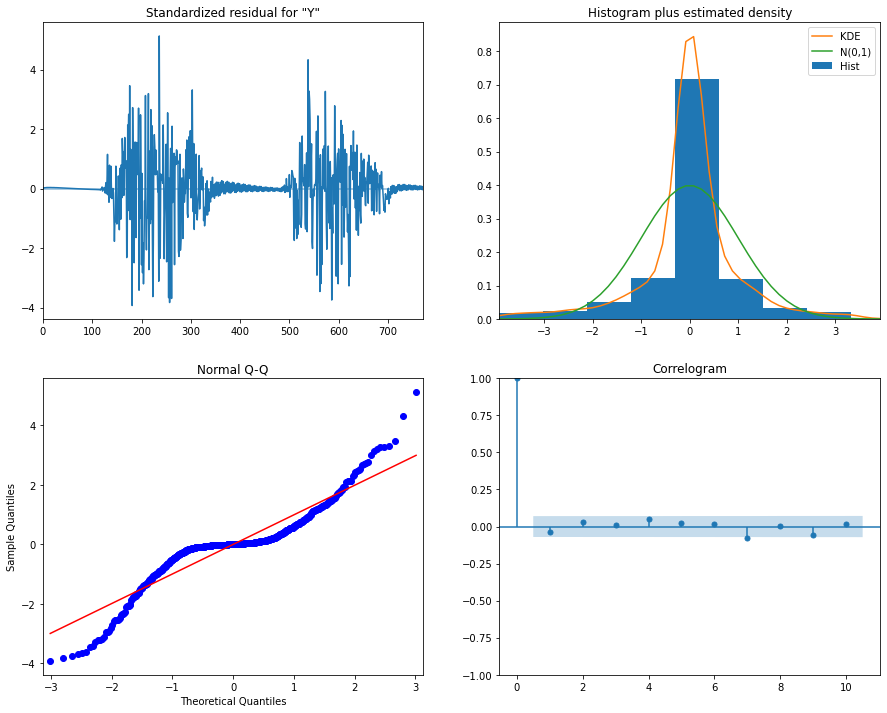

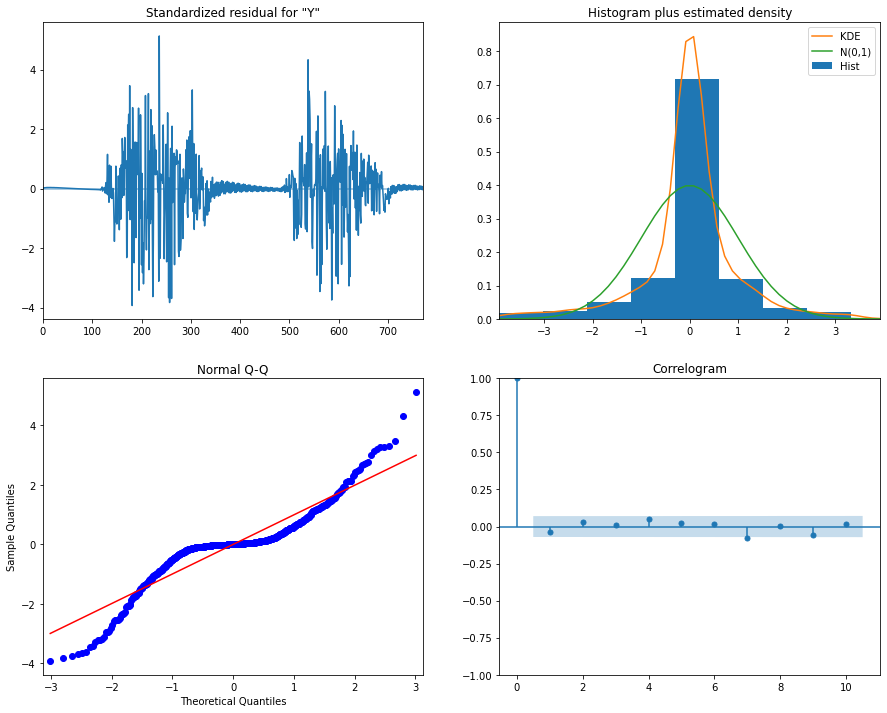

In [41]:
arima_13.plot_diagnostics(figsize=(15, 12))

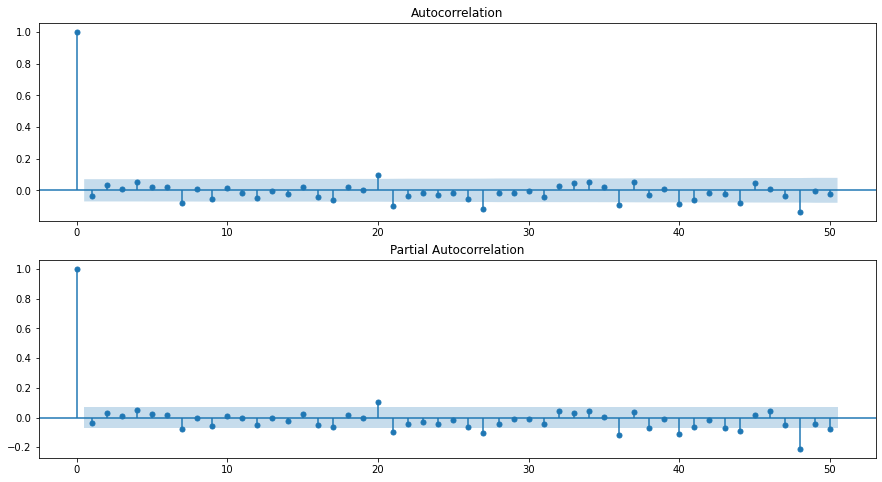

In [42]:
res = arima_13.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

From the acf and pacf plots, we can conclude that there are hardly ever autocorrelation among the residuals, thus, the information contained in the residuals can not extracted by our current model.

In [44]:
pred = arima_13.forecast(exog_test.shape[0],exog = exog_test.values)
print('ARIMA model MSE:{}'.format(mean_squared_error(sol_13_test,pred)))

ARIMA model MSE:1977.4558419755338


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


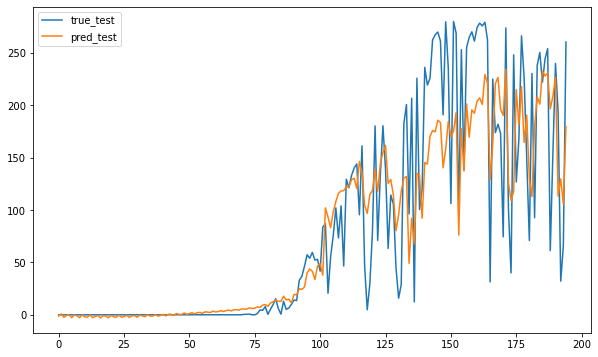

In [46]:
plt.figure(figsize=(10,6))
plt.plot(pd.DataFrame({'test':sol_13_test.values.reshape(1,-1)[0],'pred':pred.values.reshape(1,-1)[0]}))
plt.legend(["true_test","pred_test"])
plt.show()

In [93]:
Y_pred_sol, arimaxs = build_sarimax_model(X_sol_train,Y_sol_train,X_sol_test, Y_sol_test,hour_train,hour_test)        

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anacon

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported 

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

In [95]:
for i,model in enumerate(arimaxs):
    if model != 0:
        model.save("./model/solar/sol_"+str(i)+".pickle") 

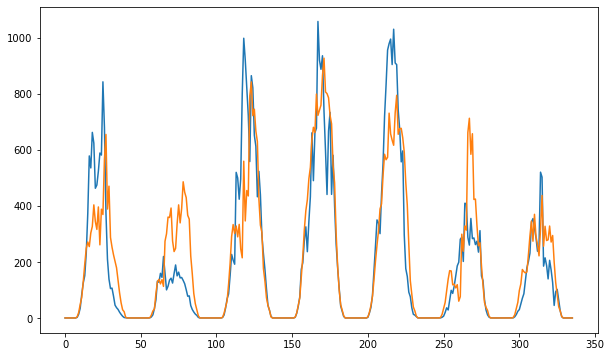

In [96]:
# Y_test_temp.dropna(inplace=True)
# Y_pred_temp.dropna(inplace=True)
plt.figure(figsize=(10,6))
plt.plot(pd.DataFrame({'test':Y_sol_test.values.reshape(1,-1)[0],'pred':Y_pred_sol.values.reshape(1,-1)[0]}))
plt.show()

In [97]:
print('ARIMAX model MSE for temperature:{}'.format(mean_squared_error(Y_sol_test,Y_pred_sol)))

ARIMAX model MSE for temperature:18170.67146928321


In [128]:
pv_df = pv_train_set_new.copy(deep=True).rename(columns={"pv_power_mw":"Y"})
pv_df = add_time_variables(pv_df)
Y_pv_train, X_pv_train, hour_train = pv_df[["Y"]], pv_df.drop(columns=["Y","hour","datetime"],axis=1), pv_df["hour"] 

pv_df = pv_test_set.copy(deep=True).rename(columns={"pv_power_mw":"Y"})
pv_df = add_time_variables(pv_df)
Y_pv_test, X_pv_test, hour_test = pv_df[["Y"]], pv_df.drop(columns=["Y","hour","datetime"],axis=1), pv_df["hour"] 

X_pv_total = pd.concat([X_pv_train,X_pv_test],axis=0)
Y_pv_total = pd.concat([Y_pv_train,Y_pv_test],axis=0)

In [113]:
# train_size = int(Y_pv_total.shape[0]*0.8)
# X_train, X_test, y_train, y_test = X_pv_total[:train_size], X_pv_total[train_size:],Y_pv_total[:train_size], Y_pv_total[train_size:]  
results = sm.OLS(Y_pv_train,X_pv_train).fit()
results.summary()
# pred = results.predict(X_test)
# pv_reg = LinearRegression().fit(X_train, y_train)    
# predict_Y = temp_reg.predict(X_test) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.548e+05
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                        0.00
Time:                        20:40:49   Log-Likelihood:                          20861.
No. Observations:               46704   AIC:                                 -4.169e+04
Df Residuals:                   46687   BIC:                                 -4.154e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
irradiance_Wm-2     0.0039   5.77e-06    669.358      0.000       0.004       0.004
panel_temp_C        0.0027      0.000     14.474      0.000       0.002       0.003
sin365              0.0247      0.007      3.795      0.000       0.012       0.037
cos365             -0.0193      0.004     -4.830      0.000      -0.027      -0.011
sin365_2           -0.0111      0.003     -3.251      0.001      -0.018      -0.004
cos365_2           -0.0114      0.003     -3.494      0.000      -0.018      -0.005
month_2             0.0139      0.005      2.689      0.007       0.004       0.024
month_3            -0.0011      0.007     -0.158      0.874      -0.015       0.013
month_4            -0.0274      0.008     -3.502      0.000      -0.043      -0.012
month_5            -0.0895      0.007    -11.954      0.000      -0.104      -0.075
month_6            -0.0468      0.007     -6.513      0.000      -0.061      -0.033
month_7            -0.0344      0.007     -4.810      0.000      -0.048      -0.020
month_8             0.0074      0.007      1.042      0.298      -0.007       0.021
month_9             0.0231      0.008      3.008      0.003       0.008       0.038
month_10           -0.0101      0.008     -1.211      0.226      -0.026       0.006
month_11           -0.0126      0.008     -1.619      0.105      -0.028       0.003
month_12           -0.0089      0.005     -1.611      0.107      -0.020       0.002
==============================================================================
Omnibus:                    64729.558   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35168894.537
Skew:                          -7.856   Prob(JB):                         0.00
Kurtosis:                     136.512   Cond. No.                     7.35e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

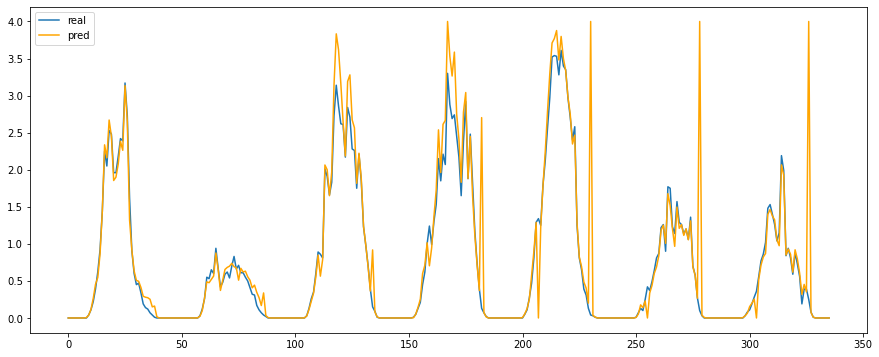

In [150]:
plt.figure(figsize=(15,6))
# pred = results.predict(X_pv_test)
plt.plot(Y_pv_test.values)
plt.plot(Y_pred_pv.values,color="orange")
plt.legend(["real","pred"])
plt.show()

In [148]:
Y_pred_pv[Y_pred_pv["Y_pred"]>4] = 4
Y_pred_pv[Y_pred_pv["Y_pred"]<0] = 0

In [133]:
Y_pred_pv, arimaxs_pv = build_sarimax_model(X_pv_train,Y_pv_train,X_pv_test, Y_pv_test,hour_train,hour_test)       

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anacon

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsu

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported 

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provi

In [158]:
for i,model in enumerate(arimaxs_pv):
    if model != 0:
        model.save("./model/pv/pv_"+str(i)+".pickle") 

In [12]:
from statsmodels.iolib.smpickle import load_pickle 
model = load_pickle("./model/temperature/temp_"+str(6)+".pickle")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                  973
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2796.607
Date:                Thu, 29 Jul 2021   AIC                           5649.214
Time:                        08:30:43   BIC                           5785.720
Sample:                             0   HQIC                          5701.177
                                - 973                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
sin365             1.8006      1.852      0.972      0.331      -1.830       5.431
cos365            -6.5464      1.983     -3.301      0.001     -10.433      -2.660
sin365_2          -1.2499      0.939     -1.332      0.183      -3.090       0.590
cos365_2           0.7742      0.928      0.834      0.404      -1.045       2.594
month_2           -1.1723      1.705     -0.687      0.492      -4.515       2.170
month_3           -4.0615      2.594     -1.566      0.117      -9.146       1.023
month_4           -6.3494      3.243     -1.958      0.050     -12.706       0.008
month_5           -7.9836      3.540     -2.255      0.024     -14.922      -1.045
month_6           -8.2798      3.631     -2.280      0.023     -15.396      -1.163
month_7           -4.3389      3.675     -1.181      0.238     -11.541       2.864
month_8           -2.7767      3.828     -0.725      0.468     -10.279       4.726
month_9           -1.7690      3.935     -0.450      0.653      -9.481       5.943
month_10          -1.7792      3.797     -0.469      0.639      -9.221       5.662
month_11          -0.7504      3.349     -0.224      0.823      -7.313       5.813
month_12          -0.9127      2.237     -0.408      0.683      -5.297       3.472
temp_location1     1.1866      0.501      2.369      0.018       0.205       2.168
temp_location2     2.6036      0.356      7.320      0.000       1.906       3.301
temp_location3    -0.7124      0.388     -1.834      0.067      -1.474       0.049
temp_location4     0.1330      0.179      0.742      0.458      -0.218       0.484
temp_location5    -2.6028      0.637     -4.084      0.000      -3.852      -1.354
temp_location6    -0.1803      0.559     -0.323      0.747      -1.276       0.915
ar.L1             -0.8403      0.169     -4.973      0.000      -1.171      -0.509
ar.L2             -0.2322      0.161     -1.444      0.149      -0.547       0.083
ar.L3              0.1824      0.032      5.653      0.000       0.119       0.246
ma.L1             -0.0090      0.171     -0.053      0.958      -0.345       0.327
ma.L2             -0.5391      0.132     -4.077      0.000      -0.798      -0.280
ma.L3             -0.4418      0.170     -2.601      0.009      -0.775      -0.109
sigma2            19.0500      0.896     21.255      0.000      17.293      20.807
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.71
Prob(Q):                              0.87   Prob(JB):                         0.06
Heteroskedasticity (H):               0.82   Skew:                            -0.07
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## forecast the pv generation using the predicted temperature and solar data

In [ ]:
# sol_weather_df = weather_train_set.iloc[:,np.arange(7)]
# weather_df = sol_weather_df.copy(deep=True)
# pv_df = pv_test_set[["datetime","irradiance_Wm-2"]].copy(deep=True).rename(columns={"irradiance_Wm-2":"Y"})
# X_sol_test, Y_sol_test, hour_test = produce_X_Y(pv_df, weather_df)

In [167]:
X_pv_train.head()

irradiance_Wm-2  panel_temp_C    sin365    cos365  sin365_2  cos365_2  \
0              0.0          7.05 -0.842572  0.538584 -0.907591 -0.419855   
1              0.0          7.38 -0.842572  0.538584 -0.907591 -0.419855   
2              0.0          7.70 -0.842572  0.538584 -0.907591 -0.419855   
3              0.0          7.48 -0.842572  0.538584 -0.907591 -0.419855   
4              0.0          7.20 -0.842572  0.538584 -0.907591 -0.419855   

   month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   month_10  month_11  month_12  
0         0         1         0  
1         0         1         0  
2         0         1         0  
3         0         1         0  
4         0         1         0

In [170]:
X_forecast.head()

irradiance_Wm-2  panel_temp_C    sin365    cos365  sin365_2  cos365_2  \
0              0.0      9.490800 -0.040844 -0.999166  0.081621  0.996663   
1              0.0      9.375931 -0.040844 -0.999166  0.081621  0.996663   
2              0.0      9.885612 -0.040844 -0.999166  0.081621  0.996663   
3              0.0      9.788170 -0.040844 -0.999166  0.081621  0.996663   
4              0.0      9.875045 -0.040844 -0.999166  0.081621  0.996663   

   month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0        0        0        0        0        0        1        0        0   
1        0        0        0        0        0        1        0        0   
2        0        0        0        0        0        1        0        0   
3        0        0        0        0        0        1        0        0   
4        0        0        0        0        0        1        0        0   

   month_10  month_11  month_12  
0         0         0         0  
1         0         0         0  
2         0         0         0  
3         0         0         0  
4         0         0         0

In [169]:
X_forecast = add_time_variables(pv_test_set[["datetime"]].copy(deep=True))
Y_pred_sol_1 = Y_pred_sol.rename({"Y_pred":"irradiance_Wm-2"},axis=1)
Y_pred_temp_1 = Y_pred_temp.rename({"Y_pred":"panel_temp_C"},axis=1)
X_forecast = pd.concat([Y_pred_sol_1,Y_pred_temp_1,X_forecast],axis=1)

X_forecast, hour_forecast = X_forecast.drop(columns=["hour","datetime"],axis=1), X_forecast["hour"] 


In [173]:
y_forecast_ho.shape[0]

7

In [174]:
Y_forecast = pd.DataFrame(columns=["pv_forecast"])
for i in range(48):
    max_pv = Y_pv_train[hour_train==i].max()[0]
    X_forecast_ho = X_forecast[hour_forecast==i]
    predictor = arimaxs_pv[i]
    if predictor == 0:
        y_forecast_ho = np.zeros(X_forecast_ho.shape[0])
    else:
        y_forecast_ho = predictor.forecast(X_forecast_ho.shape[0],exog = X_forecast_ho.values).values
        for x in range(y_forecast_ho.shape[0]):
            if y_forecast_ho[x] > max_pv:
                y_forecast_ho[x] = max_pv
            if y_forecast_ho[x] < 0:
                y_forecast_ho[x] = 0
    Y_forecast = pd.concat([Y_forecast, pd.DataFrame(data={"pv_forecast":y_forecast_ho},index=X_forecast_ho.index)],axis=0)
    
Y_forecast.sort_index(inplace=True)

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given wit

In [187]:
Y_forecast["datetime"] = pv_test_set["datetime"]
Y_forecast["irradiance_Wm-2"] = Y_pred_sol["Y_pred"]
Y_forecast["panel_temp_C"] = Y_pred_temp["Y_pred"]
Y_forecast = Y_forecast[["datetime","irradiance_Wm-2","pv_forecast","panel_temp_C"]]
Y_forecast.to_csv("../data/forecast/pv_forecast.csv",index=False)

In [182]:
for i in range(48):
    if arimaxs_pv[i] != 0:
        print(arimaxs_pv[i].model_orders)

{'trend': 0, 'exog': 17, 'ar': 5, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 5, 'reduced_ma': 3, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
{'trend': 0, 'exog': 17, 'ar': 5, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 5, 'reduced_ma': 3, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
{'trend': 0, 'exog': 17, 'ar': 4, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 3, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
{'trend': 0, 'exog': 17, 'ar': 4, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 3, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
{'trend': 0, 'exog': 17, 'ar': 4, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 3, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
{'trend': 0, 'exog': 17, 'ar': 6, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 6, 'reduced_ma': 3, 'exog_varian

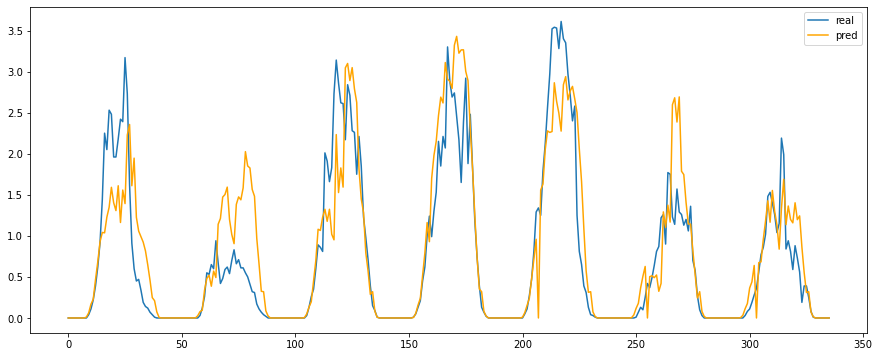

In [178]:
plt.figure(figsize=(15,6))
plt.plot(pv_test_set["pv_power_mw"])
plt.plot(Y_forecast,color="orange")
# plt.plot(pv_train_set["pv_power_mw"][-48*7:].values,color="red")
plt.legend(["real","pred","last_week"])
plt.show()

In [183]:
mean_squared_error(Y_forecast.values,pv_test_set["pv_power_mw"])

0.2505588869807357

In [184]:
mean_squared_error(pv_train_set["pv_power_mw"][-48*7:].values,pv_test_set["pv_power_mw"])

0.6263720238095238

## demand

In [131]:
demand_train_set = pd.read_csv("../data/Training_data_set4/demand_train_set4.csv")
demand_train_set["hour"]=hour_train

In [136]:
_,outlier_list = outlier_delete(demand_train_set["demand_MW"],demand_train_set["hour"])
outlier_list

[]

<AxesSubplot:title={'center':'demand_MW'}, xlabel='hour'>

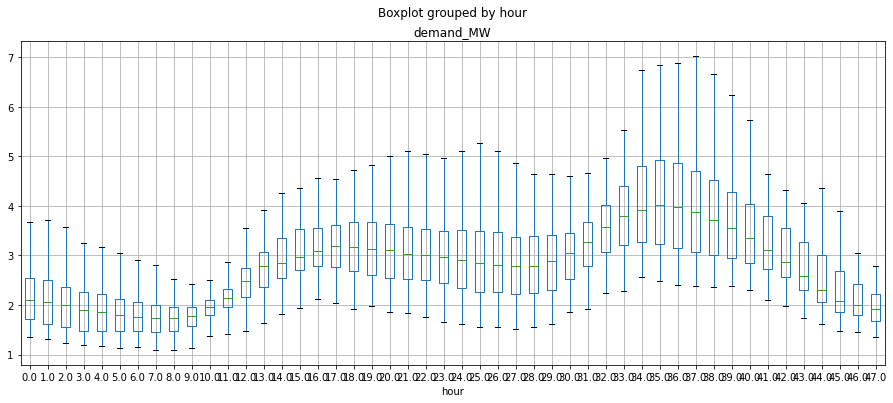

In [137]:
demand_train_set.boxplot(column="demand_MW",by="hour",figsize=(15,6))

In [135]:
def outlier_delete_all():
    outlier_list=[0]
    circle_time = 4
    while len(outlier_list)>0:
        demand_train_set["demand_MW"],outlier_list = outlier_delete(demand_train_set["demand_MW"],demand_train_set["hour"])
        demand_train_set = fill_nan_with_moving_average(demand_train_set,48)
        circle_time -= 1
        if circle_time == 0:
            break
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46704 entries, 0 to 46703
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   46704 non-null  object 
 1   demand_MW  46704 non-null  float64
 2   hour       46704 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


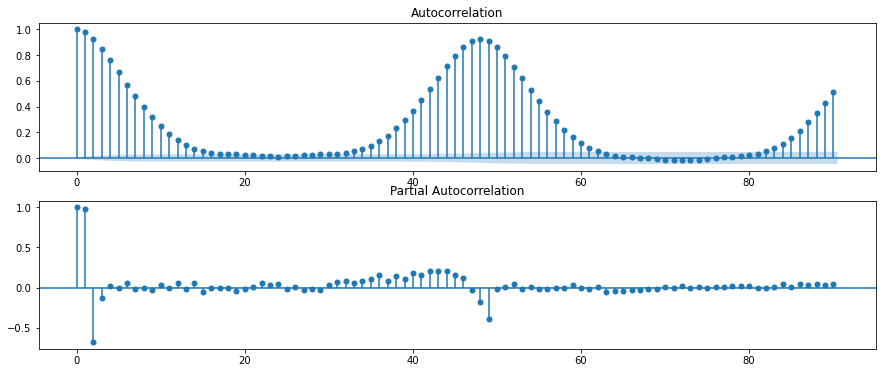

In [26]:
draw_acf_pacf(demand_train_set["demand_MW"], lags=90)

In [86]:
demand_train_set["datetime"]

0        2017-11-03 00:00:00
1        2017-11-03 00:30:00
2        2017-11-03 01:00:00
3        2017-11-03 01:30:00
4        2017-11-03 02:00:00
                ...         
46699    2020-07-02 21:30:00
46700    2020-07-02 22:00:00
46701    2020-07-02 22:30:00
46702    2020-07-02 23:00:00
46703    2020-07-02 23:30:00
Name: datetime, Length: 46704, dtype: object

In [94]:
np.linspace(0,48*7,7)

array([  0.,  56., 112., 168., 224., 280., 336.])

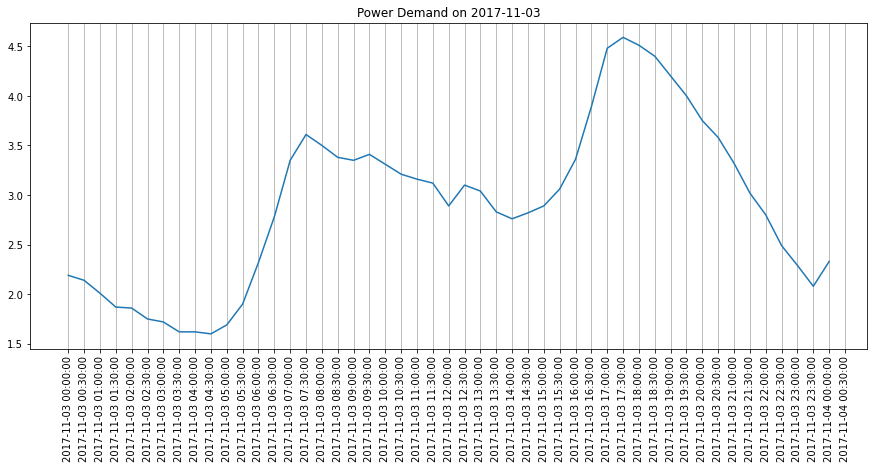

In [106]:
plt.figure(figsize=(15,6))
plt.plot(demand_train_set["demand_MW"][:48+1]) #48*7+1
# plt.xticks(ticks = np.linspace(0,48*7,8), labels = ["2017-11-0"+str(i) for i in range(3,11)] ,size=10,rotation=45)
plt.xticks(ticks = np.linspace(0,49,50), labels = demand_train_set.loc[:48+1,"datetime"] ,size=10,rotation=90)
plt.grid(axis="x")
plt.title("Power Demand on 2017-11-03")
plt.show()

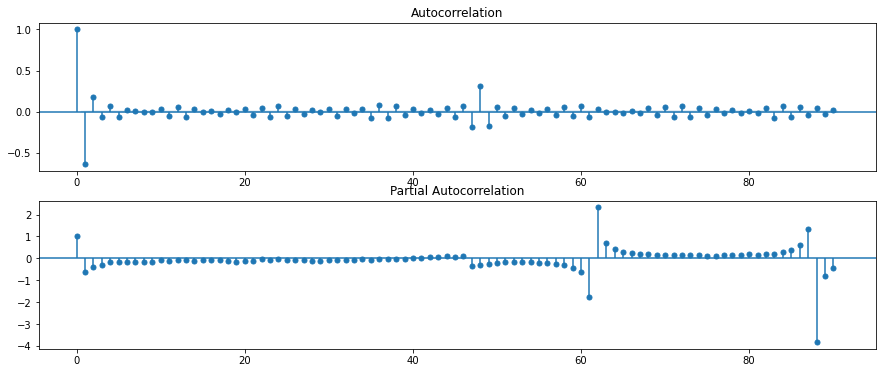

In [103]:
draw_acf_pacf(demand_train_set["demand_MW"].diff().dropna().diff().dropna().diff().dropna(), lags=90)

In [21]:
demand_train_set["hour"] = demand_train_set["datetime"].apply(calculate_hour)

In [ ]:
9-18 29-34 38-47

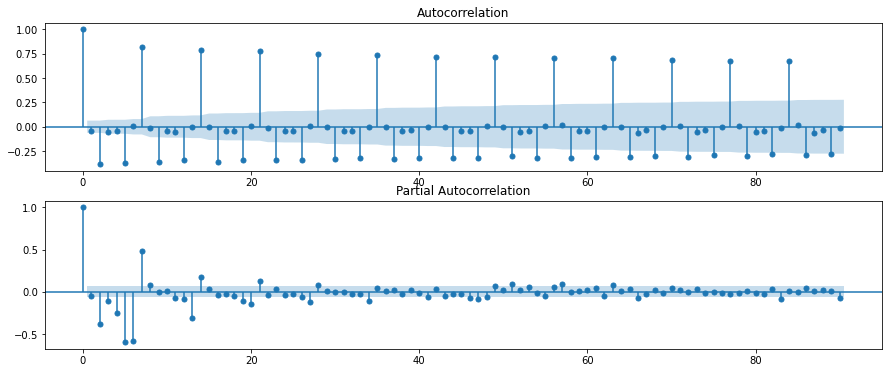

In [242]:
draw_acf_pacf(demand_train_set[demand_train_set["hour"]==14]["demand_MW"].diff().dropna(),lags=90)

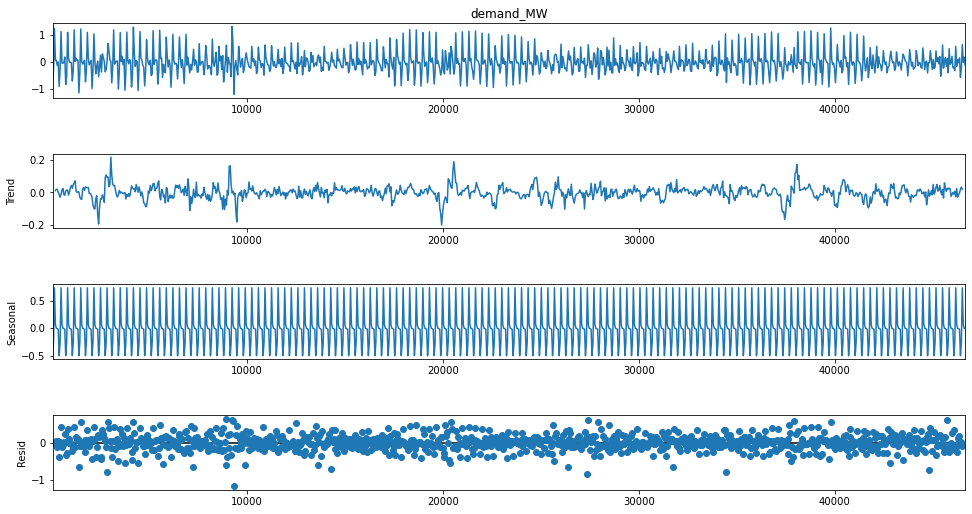

In [178]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(demand_train_set[hour_train==14]["demand_MW"].diff().dropna(),freq=7)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

There is still a weakly variation in our data, we try to use SARIMA model with seasonal order 7 and add the weakly Fourier transform item into our data

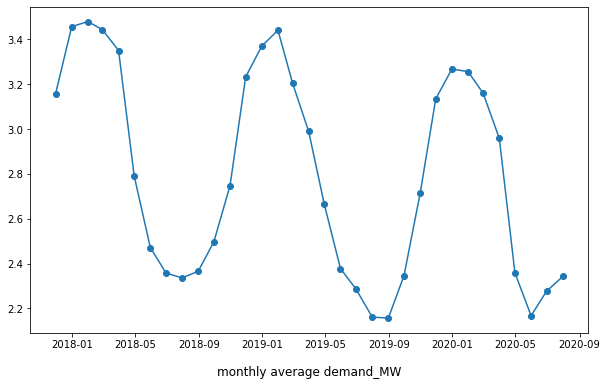

In [104]:
month_mean_plot(demand_train_set[["datetime","demand_MW"]])

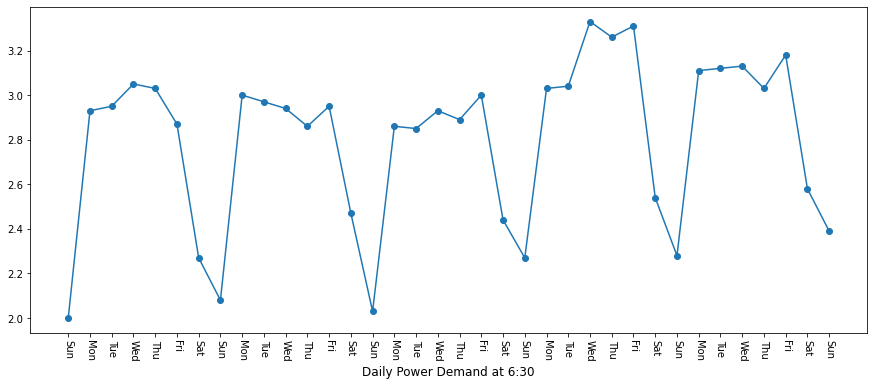

In [264]:
def day_mean_plot(df):
    temp_date_df = df.set_index("datetime")
    # index must be the Datetime tpye to use the timeseries method in pandas
    temp_date_df.index = pd.DatetimeIndex(temp_date_df.index)
#     fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (18, 6))
    plt.figure(figsize=(15,6))
    daily_df = temp_date_df.iloc[2:7*5+3,:].copy(deep=True)
    plt.plot(daily_df)
    plt.scatter(daily_df.index,daily_df)
    plt.xticks(ticks=daily_df.index,labels=map(lambda x:["Mon","Tue","Wed","Thu","Fri","Sat","Sun"][x],daily_df.index.weekday),rotation=-90)

    plt.title("Daily Power Demand at 6:30", y=-0.15)
#     print(daily_df.index)
#     ax[0].plot(daily_df)
#     ax[0].scatter(daily_df.index,daily_df)
#     ax[0].set_xticks(daily_df.index)
#     ax[0].set_xticklabels(map(lambda x:["Mon","Tue","Wed","Thu","Fri","Sat","Sun"][x],daily_df.index.weekday))
#     ax[0].tick_params(axis = 'x', which = 'major', labelsize = 10,rotation=-90)
#     ax[0].set_title("Daily Power Demand at 6:30", y=-0.15)
#     monthly_mean = temp_date_df.resample('M').mean()
#     ax[1].plot(monthly_mean)
#     ax[1].scatter(monthly_mean.index,monthly_mean)
#     ax[1].set_title("Monthly Average Power Demand at 6:30", y=-0.15)
day_mean_plot(demand_train_set[hour_train==13][["datetime","demand_MW"]])

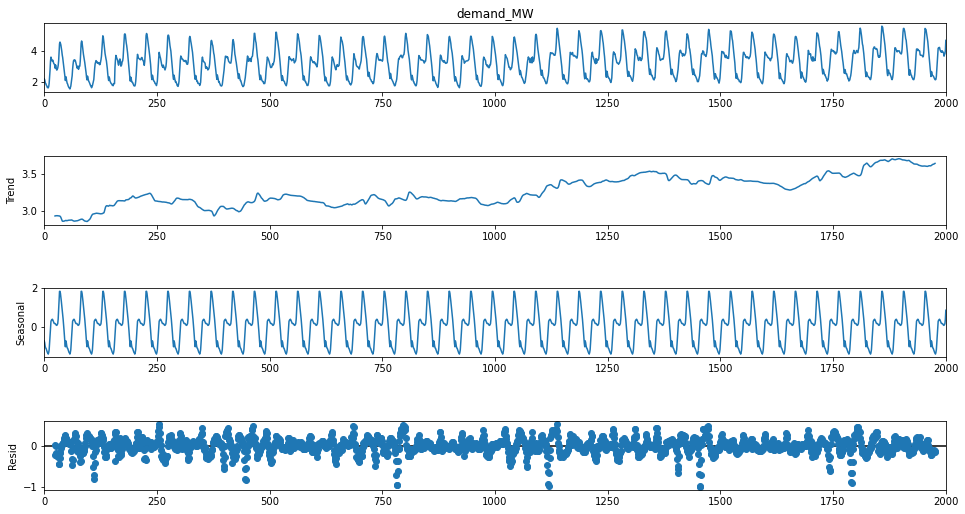

In [139]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(demand_train_set.loc[:2000,"demand_MW"],freq=48)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [155]:
def demand_X_Y_v2(demand_set):
    demand_set_exog = demand_set.copy(deep=True)
    demand_set_exog["hour"] = demand_set_exog["datetime"].apply(calculate_hour)
    
    weekend = pd.to_datetime(demand_set_exog.datetime).dt.dayofweek
    weekend[weekend<5] = 0
    weekend[weekend>=5] = 1
    demand_set_exog["weekend"] = weekend

    exog = demand_set_exog.drop(columns = ["datetime","demand_MW","hour"],axis=1)
    demand= demand_set_exog["demand_MW"]
    hour = demand_set_exog["hour"]
    return demand, exog, hour    

In [244]:
# demand_train_v2, exog_train_v2, hour_train_v2 = demand_X_Y_v2(demand_train_set)
# demand_test_v2, exog_test_v2, hour_test_v2 = demand_X_Y_v2(demand_test_set)
test_pred_v2, bestmodel_v2 = pool_construct(demand_train_v2[hour_train_v2==14], demand_test_v2[hour_test_v2==14], exog_train_v2[hour_train_v2==14], exog_test_v2[hour_test_v2==14],14)

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [231]:
mean_squared_error(demand_pred_before[hour_test==14]["demand_pred"],demand_test[hour_test==14])

0.011876003031405818

In [254]:
mean_squared_error(test_pred_v2,demand_test[hour_test==14])

0.005763345510717659

In [239]:
mean_squared_error(test_pred_v2,demand_test[hour_test==14])

0.006302432518628922

In [255]:
bestmodel_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                              demand_MW   No. Observations:                  973
Model:             SARIMAX(4, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood                 268.927
Date:                                Wed, 04 Aug 2021   AIC                           -517.854
Time:                                        17:35:25   BIC                           -469.226
Sample:                                             0   HQIC                          -499.332
                                                - 973                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
weekend       -0.5724      0.057    -10.096      0.000      -0.683      -0.461
ar.L1          0.6297      0.023     26.803      0.000       0.584       0.676
ar.L2          0.0315      0.031      1.002      0.317      -0.030       0.093
ar.L3          0.0619      0.033      1.851      0.064      -0.004       0.128
ar.L4          0.0573      0.031      1.832      0.067      -0.004       0.119
ma.L1         -1.0027      0.007   -141.619      0.000      -1.017      -0.989
ar.S.L7        0.9270      0.019     49.552      0.000       0.890       0.964
ma.S.L7       -0.6086      0.030    -20.304      0.000      -0.667      -0.550
ma.S.L14      -0.0645      0.031     -2.069      0.039      -0.126      -0.003
sigma2         0.0328      0.001     27.651      0.000       0.030       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               227.07
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.43
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [240]:
bestmodel_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                              demand_MW   No. Observations:                  973
Model:             SARIMAX(3, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood                 267.417
Date:                                Wed, 04 Aug 2021   AIC                           -516.833
Time:                                        17:15:22   BIC                           -473.068
Sample:                                             0   HQIC                          -500.163
                                                - 973                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
weekend       -0.5739      0.057    -10.145      0.000      -0.685      -0.463
ar.L1          0.6335      0.023     27.112      0.000       0.588       0.679
ar.L2          0.0337      0.031      1.081      0.280      -0.027       0.095
ar.L3          0.0968      0.027      3.591      0.000       0.044       0.150
ma.L1         -1.0037      0.007   -150.778      0.000      -1.017      -0.991
ar.S.L7        0.9255      0.019     48.714      0.000       0.888       0.963
ma.S.L7       -0.6024      0.029    -20.423      0.000      -0.660      -0.545
ma.S.L14      -0.0642      0.031     -2.074      0.038      -0.125      -0.004
sigma2         0.0329      0.001     27.584      0.000       0.031       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               229.17
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.44
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
def demand_X_Y(demand_set):
    demand_set_exog = demand_set.copy(deep=True)
    demand_set_exog["hour"] = demand_set_exog["datetime"].apply(calculate_hour)

    week_dummies = pd.get_dummies(pd.Categorical(pd.to_datetime(demand_set_exog.datetime).dt.dayofweek,categories=np.arange(1,8)),drop_first=True)
    week_dummies.columns = ['dayofweek_'+ str(w) for w in range(2,8)]
    demand_set_exog = pd.concat([demand_set_exog, week_dummies], axis=1)

    month_dummies = pd.get_dummies(pd.Categorical(pd.to_datetime(demand_set_exog.datetime).dt.month,categories=np.arange(1,13)),drop_first=True)
    month_dummies.columns = ['month_'+ str(w) for w in range(2,13)]
    demand_set_exog = pd.concat([demand_set_exog, month_dummies], axis=1)
    exog = demand_set_exog.drop(columns = ["datetime","demand_MW","hour"],axis=1)
    demand= demand_set_exog["demand_MW"]
    hour = demand_set_exog["hour"]
    return demand, exog, hour

In [79]:
exog_train.tail()

dayofweek_2  dayofweek_3  dayofweek_4  dayofweek_5  dayofweek_6  \
46699            0            1            0            0            0   
46700            0            1            0            0            0   
46701            0            1            0            0            0   
46702            0            1            0            0            0   
46703            0            1            0            0            0   

       dayofweek_7  month_2  month_3  month_4  month_5  month_6  month_7  \
46699            0        0        0        0        0        0        1   
46700            0        0        0        0        0        0        1   
46701            0        0        0        0        0        0        1   
46702            0        0        0        0        0        0        1   
46703            0        0        0        0        0        0        1   

       month_8  month_9  month_10  month_11  month_12  
46699        0        0         0         0         0  
46700        0        0         0         0         0  
46701        0        0         0         0         0  
46702        0        0         0         0         0  
46703        0        0         0         0         0

In [84]:
demand_train, exog_train, hour_train = demand_X_Y(demand_train_set)

In [85]:
demand_test_set = pd.read_csv("../data/test_set4/demand_test_set4.csv")
demand_test, exog_test, hour_test = demand_X_Y(demand_test_set)

In [259]:
def hour_demand_forecast(demand_train,demand_test,exog_train,exog_test, hour_train, hour_test):
    demand_pred = pd.Series(name="demand_pred")
    
    models = []
    for i in range(48):
        train_ts = demand_train[hour_train==i]
        test_ts = demand_test[hour_test==i]
        exog_train_ts = exog_train[hour_train==i]
        exog_test_ts = exog_test[hour_test==i]
#         train_size = int(demand.shape[0]*0.8)
#         demand_train, demand_test, exog_train, exog_test = demand[:train_size],demand[train_size:],exog[:train_size], exog[train_size:]
        test_pred, model = pool_construct(train_ts, test_ts, exog_train_ts, exog_test_ts,i)
        
        models.append(model)
        demand_pred = demand_pred.append(pd.Series(data=test_pred,index=test_ts.index, name="demand_pred"))

    demand_pred.sort_index(inplace=True)
    return demand_pred,models

In [230]:
np.hstack((np.arange(5),np.arange(3),np.arange(10)))

array([0, 1, 2, 3, 4, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [256]:
def pool_construct(demand_train, demand_test, exog_train, exog_test,hour):
    import itertools 
    from functools import partial
    from multiprocessing.dummy import Pool   
    if hour in np.hstack((np.arange(9,19),np.arange(29,35),np.arange(38,48))):
        p = range(3,5)
        q = range(1,3) 
        sp = range(0,2)
        sq = range(2,4)        
    else:
        p = range(1,3)
        q = range(1,3) 
        sp = range(0,2)
        sq = range(1,3)
    pdq = list(itertools.product(p, [1], q))
    seasonal_pdq = list(itertools.product(sp, [0], sq,[7]))#rlist(itertools.product(sp, [0], sq,[0]))<- ARIMAX
    params_pool = list(itertools.product(pdq, seasonal_pdq))
                       
    pool = Pool()
    poolfunction = partial(demand_forecast, demand_train, exog_train)
                       
    models = pool.map(poolfunction, params_pool)
    pool.close()
    pool.join()
    
    aics = [model.aic for model in models]
    min_ind = aics.index(min(aics)) 
    bestmodel = models[min_ind]
    test_pred = bestmodel.forecast(steps = demand_test.shape[0], exog=exog_test).values
    return test_pred, bestmodel

In [257]:
def demand_forecast(demand_train, exog_train, params_pool):
    param = params_pool[0]
    param_seasonal = params_pool[1]
    model = sm.tsa.statespace.SARIMAX(demand_train,
                                    order=param,
                                    exog = exog_train,
                                    seasonal_order=param_seasonal,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False).fit()
    return model

In [260]:
demand_pred, models = hour_demand_forecast(demand_train_v2,demand_test_v2,exog_train_v2,exog_test_v2, hour_train_v2, hour_test_v2)

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_lear

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and w

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\l

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

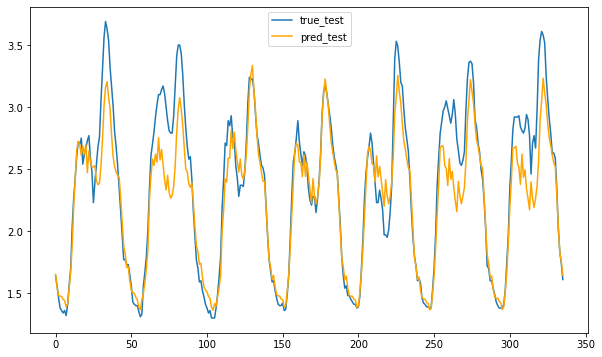

In [58]:
plt.figure(figsize=(10,6))
plt.plot(demand_test.values)
plt.plot(demand_pred, color="orange")
plt.legend(["true_test","pred_test"])

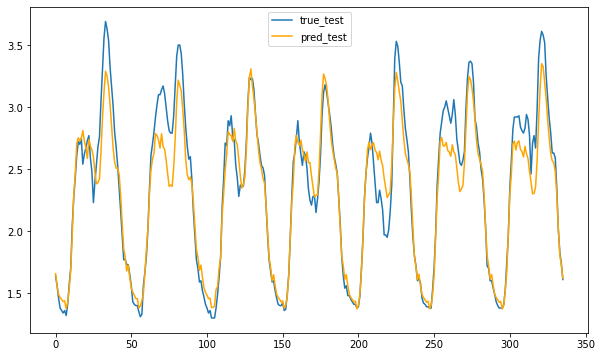

In [266]:
plt.figure(figsize=(10,6))
plt.plot(demand_test.values)
plt.plot(demand_pred, color="orange")
plt.legend(["true_test","pred_test"])

In [269]:
demand_pred_total = demand_test_set[["datetime"]].copy()
demand_pred_total["demand_pred"] = demand_pred

In [164]:
demand_pred_before = pd.read_csv("../data/forecast/demand_forecast.csv")
demand_pred_before.head()

datetime  demand_pred
0  2020-07-03 00:00:00     1.654743
1  2020-07-03 00:30:00     1.561220
2  2020-07-03 01:00:00     1.482830
3  2020-07-03 01:30:00     1.479296
4  2020-07-03 02:00:00     1.463603

In [267]:
mean_squared_error(demand_pred,demand_test)

0.033792687806443886

In [163]:
mean_squared_error(demand_pred_before["demand_pred"],demand_test)

0.06036393793694676

In [270]:
demand_pred_total.to_csv("../data/forecast/demand_forecast_v1.csv",index=False)

In [268]:
# save models
for i,model in enumerate(models):
#     print(model.model_orders)
    model.save("./model/demand/demand_"+str(i)+".pickle") 



In [232]:
from statsmodels.iolib.smpickle import load_pickle 
demand_model = load_pickle("./model/demand/demand_14.pickle")
demand_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         demand_MW   No. Observations:                  973
Model:             SARIMAX(5, 1, 2)x(2, 0, 2, 7)   Log Likelihood                 -35.871
Date:                           Wed, 04 Aug 2021   AIC                            129.741
Time:                                   16:54:39   BIC                            270.670
Sample:                                        0   HQIC                           183.429
                                           - 973                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
dayofweek_2    -0.0127      0.051     -0.250      0.802      -0.112       0.087
dayofweek_3     0.0223      0.060      0.369      0.712      -0.096       0.141
dayofweek_4     0.0258      0.061      0.423      0.672      -0.094       0.145
dayofweek_5    -0.4993      0.061     -8.171      0.000      -0.619      -0.380
dayofweek_6    -0.7426      0.060    -12.360      0.000      -0.860      -0.625
dayofweek_7     -8e-19        nan        nan        nan         nan         nan
month_2         0.0845      0.126      0.673      0.501      -0.161       0.331
month_3         0.0216      0.158      0.137      0.891      -0.288       0.331
month_4        -0.0317      0.156     -0.203      0.839      -0.338       0.275
month_5        -0.1977      0.147     -1.344      0.179      -0.486       0.091
month_6        -0.2806      0.173     -1.625      0.104      -0.619       0.058
month_7        -0.2600      0.197     -1.317      0.188      -0.647       0.127
month_8        -0.2425      0.205     -1.184      0.237      -0.644       0.159
month_9        -0.0348      0.207     -0.168      0.867      -0.441       0.371
month_10        0.1864      0.170      1.096      0.273      -0.147       0.520
month_11        0.1224      0.125      0.980      0.327      -0.122       0.367
month_12        0.1113      0.060      1.862      0.063      -0.006       0.228
ar.L1          -0.1643      3.030     -0.054      0.957      -6.103       5.774
ar.L2           0.1917      1.468      0.131      0.896      -2.685       3.069
ar.L3           0.1665      0.375      0.444      0.657      -0.568       0.901
ar.L4           0.1926      0.747      0.258      0.796      -1.271       1.656
ar.L5           0.0188      0.111      0.170      0.865      -0.198       0.236
ma.L1           0.5502      7.197      0.076      0.939     -13.555      14.656
ma.L2          -1.5269      7.130     -0.214      0.830     -15.501      12.448
ar.S.L7         0.2527      1.116      0.226      0.821      -1.935       2.440
ar.S.L14        0.3695      0.836      0.442      0.658      -1.268       2.008
ma.S.L7        -0.0581      1.117     -0.052      0.959      -2.248       2.132
ma.S.L14       -0.2682      0.623     -0.431      0.667      -1.488       0.952
sigma2          0.0265      0.247      0.107      0.915      -0.458       0.511
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            103415.93
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        54.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradien

In [ ]:
# how to load the model
from statsmodels.iolib.smpickle import load_pickle 
demand_models = []
for i in range(48):
    try:
        demand_model = load_pickle("./model/demand/demand_"+str(i)+".pickle")
    except:
        demand_model = 0
    demand_models.append(demand_model)

# how to use the model
for demand_model in demand_models:
    demand_pred = pd.Series(name="demand_pred")
    if demand_model == 0:
        test_pred = np.zeros(demand_test[hour_test==i].shape[0])
    else:
        test_pred = demand_model.forecast(steps = demand_Y_24_test.shape[0], exog=exog_test[hour_test==i].values).values
    demand_pred = demand_pred.append(pd.Series(data=test_pred,index=demand_test[hour_test==i].index, name="demand_pred"))
demand_pred.sort_index(inplace=True)

# new_results = load_pickle("./model/demand/demand_24.pickle")
# new_pre = new_results.forecast(steps = demand_Y_24_test.shape[0], exog=demand_exog_24_test).values
# plt.figure(figsize=(10,6))
# plt.plot(demand_Y_24_test.values)
# plt.plot(new_pre, color="orange")
# plt.legend(["true_test","pred_test"])
# plt.show()

In [38]:
import itertools 

In [36]:
demand_Y_24 = demand_train[hour_train==24] 
demand_exog_24 = exog_train[hour_train==24]
train_size = int(demand_Y_24.shape[0]*0.8)
demand_Y_24_train, demand_Y_24_test,demand_exog_24_train,demand_exog_24_test =demand_Y_24[:train_size], demand_Y_24[train_size:],demand_exog_24[:train_size],demand_exog_24[train_size:]
# demand_Y_24_train, demand_Y_24_test,demand_exog_24_train,demand_exog_24_test = demand_train[hour_train==24],demand_test[hour_test==24],exog_train[hour_train==24],exog_test[hour_test==24]

In [131]:
test_pred, bestmodel = pool_construct(demand_Y_24_train, demand_Y_24_test, demand_exog_24_train, demand_exog_24_test)

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided a

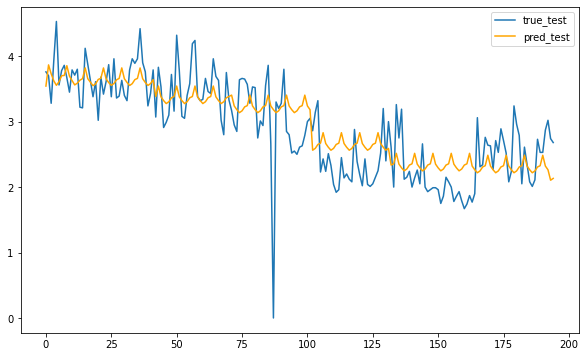

In [114]:
plt.figure(figsize=(10,6))
plt.plot(demand_Y_24_test.values)
plt.plot(test_pred, color="orange")
plt.legend(["true_test","pred_test"])
plt.show()

In [145]:
pred1 = demand_sarimax.forecast(steps = demand_Y_24.shape[0]-train_size, exog=demand_exog_24_test)

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [135]:

p = range(4,7)
q = range(2,4) 
pdq = list(itertools.product(p, [1], q))
sp = sq = range(1,3)
#range(0,1) <- ARIMAX 
seasonal_pdq = list(itertools.product(sp, [0], sq,[7]))#rlist(itertools.product(sp, [0], sq,[0]))<- ARIMAX
params_s = [] 
params = []
aics = [] 
mses = [] 
cnt = 0  
for param in pdq: 
    for param_seasonal in seasonal_pdq:
    #     try:
        mod = sm.tsa.statespace.SARIMAX(demand_Y_24_train,
                                        order=param,
                                        exog = demand_exog_24_train,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()
        pred = results.get_prediction(start = train_size,
                                  end = demand_Y_24.shape[0]-1,exog=demand_exog_24_test)
        params.append(param)
        params_s.append(param_seasonal)
        aics.append(results.aic)
        mses.append(mean_squared_error(demand_Y_24_test,pred.predicted_mean))


#         if cnt % 8 == 0:
        print('SARIMAX{}x{} - AIC:{} - MSE:{}'.format(param, param_seasonal,results.aic,mses[-1]))
#             cnt += 1

    #     except:
    #         raise RuntimeError
    #         continue

min_ind = aics.index(min(aics)) 
bestparam_aic = (params[min_ind],params_s[min_ind]) 
print('best_param_aic:',bestparam_aic,' aic:',min(aics)) 
min_ind = mses.index(min(mses)) 
bestparam_mse = (params[min_ind],params_s[min_ind])  
print('best_param_mse:',bestparam_mse,' mse:',min(mses))
print('Finish!!')

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported i

SARIMAX(4, 1, 2)x(2, 0, 2, 7) - AIC:886.2464978987745 - MSE:0.5344215587081568


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 2)x(2, 0, 3, 7) - AIC:885.7150904259361 - MSE:0.5704530976843172


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 2)x(2, 1, 2, 7) - AIC:1265.2145701996612 - MSE:1.8860413497153794


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 2)x(2, 1, 3, 7) - AIC:949.516708981568 - MSE:1.0953133858933732


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 2)x(3, 0, 2, 7) - AIC:885.5610089072477 - MSE:0.574823098342291


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 2)x(3, 0, 3, 7) - AIC:888.06555462482 - MSE:0.615277281958995


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 2)x(3, 1, 2, 7) - AIC:946.7020068565205 - MSE:0.9968252157304043


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 2)x(3, 1, 3, 7) - AIC:950.0210627768013 - MSE:0.9774178140530869


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 3)x(2, 0, 2, 7) - AIC:885.2713498765709 - MSE:0.4949354116217957


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 3)x(2, 0, 3, 7) - AIC:881.6834053764155 - MSE:0.3251842903285621


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 3)x(2, 1, 2, 7) - AIC:936.7175593335264 - MSE:1.1199712241266389


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 3)x(2, 1, 3, 7) - AIC:930.9574267353019 - MSE:1.0672761039870446


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 3)x(3, 0, 2, 7) - AIC:881.3385317460875 - MSE:0.30237479703212883


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 3)x(3, 0, 3, 7) - AIC:882.8873787710422 - MSE:0.275406180157434


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 3)x(3, 1, 2, 7) - AIC:935.1067278827505 - MSE:1.0737010294357254


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(4, 1, 3)x(3, 1, 3, 7) - AIC:933.1085767282334 - MSE:1.0207175452726622


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 2)x(2, 0, 2, 7) - AIC:887.0134974805302 - MSE:0.5085509235600816


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 2)x(2, 0, 3, 7) - AIC:885.4786814656716 - MSE:0.46290225322642625


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 2)x(2, 1, 2, 7) - AIC:957.4641480042849 - MSE:1.0721264771673467


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 2)x(2, 1, 3, 7) - AIC:936.1658589758115 - MSE:0.9651615850125473


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 2)x(3, 0, 2, 7) - AIC:885.6249973441141 - MSE:0.5220962000923014


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 2)x(3, 0, 3, 7) - AIC:885.1894684366844 - MSE:0.34605811269908227


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 2)x(3, 1, 2, 7) - AIC:948.3217770439899 - MSE:0.9634103098983662


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 2)x(3, 1, 3, 7) - AIC:930.407699572 - MSE:0.9054675560944757


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 3)x(2, 0, 2, 7) - AIC:884.4819473497726 - MSE:0.3037127746420181


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 3)x(2, 0, 3, 7) - AIC:882.7306939821426 - MSE:0.3311732731375495


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 3)x(2, 1, 2, 7) - AIC:982.1752539949408 - MSE:1.1358798596506485


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 3)x(2, 1, 3, 7) - AIC:969.5151168590394 - MSE:1.1216471639016474


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 3)x(3, 0, 2, 7) - AIC:881.0051302265506 - MSE:0.2649069089030915


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 3)x(3, 0, 3, 7) - AIC:884.0369633101793 - MSE:0.32583638967764617


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 3)x(3, 1, 2, 7) - AIC:984.7568388289629 - MSE:1.0907837833231888


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(5, 1, 3)x(3, 1, 3, 7) - AIC:974.4347007832572 - MSE:1.0442916746949304


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 2)x(2, 0, 2, 7) - AIC:884.7726283016486 - MSE:0.33764080109914857


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 2)x(2, 0, 3, 7) - AIC:883.5857259922313 - MSE:0.29367955085248154


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 2)x(2, 1, 2, 7) - AIC:918.6770767472271 - MSE:0.6424439031433776


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 2)x(2, 1, 3, 7) - AIC:912.398309955391 - MSE:0.2728302505662387


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 2)x(3, 0, 2, 7) - AIC:881.0696024701183 - MSE:0.2553405859853643


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 2)x(3, 0, 3, 7) - AIC:884.1714190723574 - MSE:0.2802689971234643


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 2)x(3, 1, 2, 7) - AIC:915.0470566090335 - MSE:0.5076179416564578


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 2)x(3, 1, 3, 7) - AIC:916.1299635990817 - MSE:0.47736967715174616


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 3)x(2, 0, 2, 7) - AIC:889.6675165787433 - MSE:0.5409648697146472


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 3)x(2, 0, 3, 7) - AIC:885.3162111718561 - MSE:0.33664792164343704


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 3)x(2, 1, 2, 7) - AIC:975.6620891538244 - MSE:1.1805450360600471


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 3)x(2, 1, 3, 7) - AIC:974.3700601112671 - MSE:1.1358814499114214


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 3)x(3, 0, 2, 7) - AIC:883.7276736350072 - MSE:0.27660359304645077


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 3)x(3, 0, 3, 7) - AIC:884.8416820816875 - MSE:0.2691534570298194


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

SARIMAX(6, 1, 3)x(3, 1, 2, 7) - AIC:975.8402608637485 - MSE:0.990947290364127


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(6, 1, 3)x(3, 1, 3, 7) - AIC:975.4904429364825 - MSE:1.080877330116973
best_param_aic: ((5, 1, 3), (3, 0, 2, 7))  aic: 881.0051302265506
best_param_mse: ((6, 1, 2), (3, 0, 2, 7))  mse: 0.2553405859853643
Finish!!


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [52]:

p = range(4,7)
q = range(1,3) 
pdq = list(itertools.product(p, [1], q))
sp = range(0,2)
sq = range(2,4)
#range(0,1) <- ARIMAX 
seasonal_pdq = list(itertools.product(sp, [0], sq,[7]))#rlist(itertools.product(sp, [0], sq,[0]))<- ARIMAX
params_s = [] 
params = []
aics = [] 
mses = [] 
cnt = 0  
for param in pdq: 
    for param_seasonal in seasonal_pdq:
    #     try:
        mod = sm.tsa.statespace.SARIMAX(demand_Y_24_train,
                                        order=param,
                                        exog = demand_exog_24_train,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()
        pred = results.get_prediction(start = train_size,
                                  end = demand_Y_24.shape[0]-1,exog=demand_exog_24_test)
        params.append(param)
        params_s.append(param_seasonal)
        aics.append(results.aic)
        mses.append(mean_squared_error(demand_Y_24_test,pred.predicted_mean))


#         if cnt % 8 == 0:
#         print('SARIMAX{}x{} - AIC:{} - MSE:{}'.format(param, param_seasonal,results.aic,mses[-1]))
#             cnt += 1

    #     except:
    #         raise RuntimeError
    #         continue
min_ind = aics.index(min(aics)) 
bestparam_aic = (params[min_ind],params_s[min_ind]) 
print('best_param_aic:',bestparam_aic,' aic:',min(aics)) 
min_ind = mses.index(min(mses)) 
bestparam_mse = (params[min_ind],params_s[min_ind])  
print('best_param_mse:',bestparam_mse,' mse:',min(mses))
print('Finish!!')

best_param_aic: ((4, 1, 1), (0, 0, 2, 7))  aic: 871.7890220898539
best_param_mse: ((5, 1, 1), (0, 0, 3, 7))  mse: 0.20545339990473435
Finish!!


In [53]:
for i in np.array(mses).argsort():
    print('SARIMAX{}x{} - AIC:{} - MSE:{}'.format(params[i],params_s[i],aics[i],mses[i]))

SARIMAX(5, 1, 1)x(0, 0, 3, 7) - AIC:874.226805477994 - MSE:0.20545339990473435
SARIMAX(4, 1, 1)x(0, 0, 2, 7) - AIC:871.7890220898539 - MSE:0.20988222192962172
SARIMAX(6, 1, 2)x(0, 0, 3, 7) - AIC:873.4664115810854 - MSE:0.21066502544273405
SARIMAX(4, 1, 1)x(1, 0, 3, 7) - AIC:873.6103873768656 - MSE:0.21164284342611353
SARIMAX(5, 1, 1)x(0, 0, 2, 7) - AIC:872.294396494653 - MSE:0.2120467671914918
SARIMAX(6, 1, 2)x(1, 0, 3, 7) - AIC:875.45541306824 - MSE:0.21632891413768057
SARIMAX(6, 1, 2)x(0, 0, 2, 7) - AIC:873.753257247913 - MSE:0.21669942893757513
SARIMAX(6, 1, 2)x(1, 0, 2, 7) - AIC:881.258491354243 - MSE:0.21924869820442214
SARIMAX(5, 1, 1)x(1, 0, 3, 7) - AIC:879.5854151346068 - MSE:0.22460609167952164
SARIMAX(5, 1, 2)x(1, 0, 3, 7) - AIC:879.5333239569861 - MSE:0.22534249174128695
SARIMAX(5, 1, 2)x(0, 0, 3, 7) - AIC:877.8504238273215 - MSE:0.22638628565563368
SARIMAX(5, 1, 2)x(0, 0, 2, 7) - AIC:877.8389901691743 - MSE:0.23739833846634908
SARIMAX(4, 1, 2)x(1, 0, 3, 7) - AIC:883.5711572

best_param_aic: ((4, 1, 1), (0, 0, 2, 7))  aic: 871.7890220898539
best_param_mse: ((5, 1, 1), (0, 0, 1, 7))  mse: 0.20891790285721154

In [40]:
demand_sarimax =  sm.tsa.statespace.SARIMAX(demand_Y_24_train,
                                        order=bestparam_mse[0],
                                        exog = demand_exog_24_train,
                                        seasonal_order=bestparam_mse[1],
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit()
pred = demand_sarimax.get_prediction(start = train_size,
                                  end = demand_Y_24.shape[0]-1,exog=demand_exog_24_test)

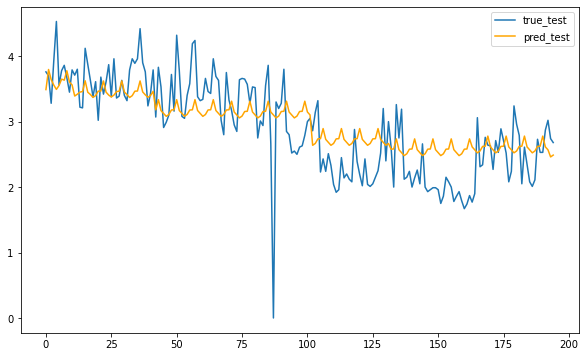

In [156]:
plt.figure(figsize=(10,6))
plt.plot(demand_Y_24_test.values)
plt.plot(pred.predicted_mean.values, color="orange")
plt.legend(["true_test","pred_test"])
plt.show()